# **Capstone project: Providing data-driven suggestions for HR**

##**Description and deliverables**

- Analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

- Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Either use a regression model or machine learning model to predict whether or not an employee will leave the company.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


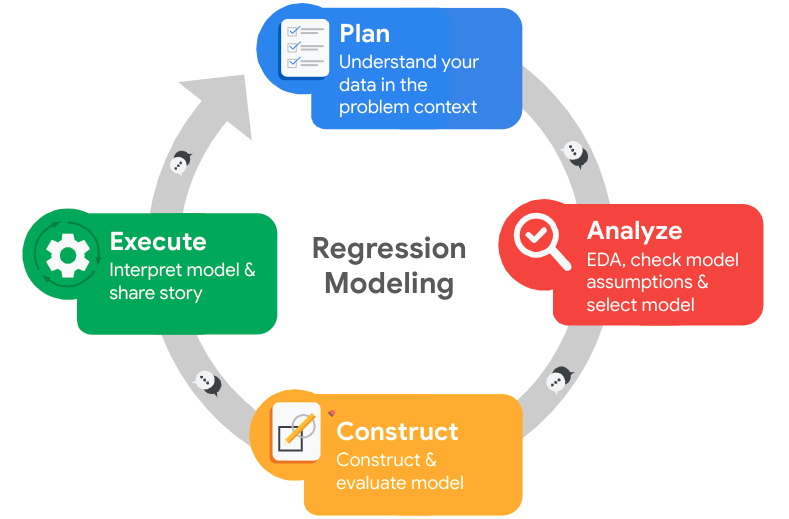

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

###**Understand the business scenario and problem**

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

###**Familiarize yourself with the HR dataset**

The dataset that you'll be using in this lab contains **15,000 rows** and **10 columns** for the variables listed below.

**Note:** For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Import Files from Google Drive to Colab**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Step 1. Imports**

*   Import packages
*   Load dataset



###**Import packages**

In [2]:
# For numerics + dataframes
import numpy as np
import pandas as pd

# For data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn functions for pre-processing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder

# Scikit-learn functions for data modeling
# Constructing Logistic regression, Decision tree, Random forest, and XGBoost.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

# Scikit-learn functions for evaluation of metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

###**Load dataset**

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  

In [3]:
# Load dataset into a dataframe
df0 = pd.read_csv("/content/drive/MyDrive/HR_comma_sep.csv")

# Display first few rows of the dataframe
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

##**Step 2. Data Exploration (Initial EDA and data cleaning)**

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



###**Gather basic information about the data**

In [4]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


###**Gather descriptive statistics about the data**

In [5]:
# Gather descriptive statistics about the data
df0.describe(include='all')

satisfaction_level  last_evaluation  number_project  \
count         14999.000000     14999.000000    14999.000000   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean              0.612834         0.716102        3.803054   
std               0.248631         0.171169        1.232592   
min               0.090000         0.360000        2.000000   
25%               0.440000         0.560000        3.000000   
50%               0.640000         0.720000        4.000000   
75%               0.820000         0.870000        5.000000   
max               1.000000         1.000000        7.000000   

        average_montly_hours  time_spend_company  Work_accident          left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
unique                   NaN                 NaN            NaN           NaN   
top                      NaN                 NaN            NaN           NaN   
freq                     NaN                 NaN            NaN           NaN   
mean              201.050337            3.498233       0.144610      0.238083   
std                49.943099            1.460136       0.351719      0.425924   
min                96.000000            2.000000       0.000000      0.000000   
25%               156.000000            3.000000       0.000000      0.000000   
50%               200.000000            3.000000       0.000000      0.000000   
75%               245.000000            4.000000       0.000000      0.000000   
max               310.000000           10.000000       1.000000      1.000000   

        promotion_last_5years Department salary  
count            14999.000000      14999  14999  
unique                    NaN         10      3  
top                       NaN      sales    low  
freq                      NaN       4140   7316  
mean                 0.021268        NaN    NaN  
std                  0.144281        NaN    NaN  
min                  0.000000        NaN    NaN  
25%                  0.000000        NaN    NaN  
50%                  0.000000        NaN    NaN  
75%                  0.000000        NaN    NaN  
max                  1.000000        NaN    NaN

###**Rename columns**

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df0.rename(columns = {'last_evaluation': 'last_performance_evaluation', 'number_project': 'number_of_projects',
                      'average_montly_hours': 'average_monthly_hours', 'Work_accident': 'work_accident',
                      'left': 'left_company', 'promotion_last_5years':'promotion_last_five_years', 'Department': 'department'},
           inplace = True)

# Display all columns with the new names
df0.columns

Index(['satisfaction_level', 'last_performance_evaluation',
       'number_of_projects', 'average_monthly_hours', 'time_spend_company',
       'work_accident', 'left_company', 'promotion_last_five_years',
       'department', 'salary'],
      dtype='object')

###**Check missing values**

Check for any missing values in the data.

In [8]:
# Check for missing values
df0.isna().sum()

satisfaction_level             0
last_performance_evaluation    0
number_of_projects             0
average_monthly_hours          0
time_spend_company             0
work_accident                  0
left_company                   0
promotion_last_five_years      0
department                     0
salary                         0
dtype: int64

 - There are no missing values.

###**Check duplicates**

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
df0.duplicated().sum()

3008

- There are 3008 duplicate values in the data that needs to be removed.

In [10]:
# Inspect some rows containing duplicates as needed

# Sort the DataFrame by its columns
sorted_df0 = df0.sort_values(by=df0.columns.tolist())

# Find duplicate rows in the sorted DataFrame
duplicate_rows = sorted_df0[sorted_df0.duplicated()]

# Display the rows containing duplicates
duplicate_rows

satisfaction_level  last_performance_evaluation  number_of_projects  \
12030                0.09                         0.62                   6   
14241                0.09                         0.62                   6   
12071                0.09                         0.77                   5   
14282                0.09                         0.77                   5   
12652                0.09                         0.77                   6   
...                   ...                          ...                 ...   
13283                1.00                         0.86                   2   
12916                1.00                         0.86                   4   
13089                1.00                         0.88                   6   
13586                1.00                         0.93                   5   
12902                1.00                         0.93                   5   

       average_monthly_hours  time_spend_company  work_accident  left_company  \
12030                    294                   4              0             1   
14241                    294                   4              0             1   
12071                    275                   4              0             1   
14282                    275                   4              0             1   
12652                    290                   4              0             1   
...                      ...                 ...            ...           ...   
13283                    264                   3              0             0   
12916                    245                   4              0             0   
13089                    201                   4              0             0   
13586                    167                   3              0             0   
12902                    231                   2              0             0   

       promotion_last_five_years   department  salary  
12030                          0   accounting     low  
14241                          0   accounting     low  
12071                          0  product_mng  medium  
14282                          0  product_mng  medium  
12652                          0    technical  medium  
...                          ...          ...     ...  
13283                          0           IT  medium  
12916                          0        sales  medium  
13089                          0    technical     low  
13586                          0        sales  medium  
12902                          0    marketing  medium  

[3008 rows x 10 columns]

In [11]:
# Display the dataframe shape before eliminating the duplicates
print("Before eliminating duplicate values:",df0.shape)

# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep = "first").reset_index(drop = True)

# Display the dataframe shape before eliminating the duplicates
print("Post eliminating duplicate values:",df1.shape)

# Display first few rows of new dataframe as needed
df1.head()

Before eliminating duplicate values: (14999, 10)
Post eliminating duplicate values: (11991, 10)


satisfaction_level  last_performance_evaluation  number_of_projects  \
0                0.38                         0.53                   2   
1                0.80                         0.86                   5   
2                0.11                         0.88                   7   
3                0.72                         0.87                   5   
4                0.37                         0.52                   2   

   average_monthly_hours  time_spend_company  work_accident  left_company  \
0                    157                   3              0             1   
1                    262                   6              0             1   
2                    272                   4              0             1   
3                    223                   5              0             1   
4                    159                   3              0             1   

   promotion_last_five_years department  salary  
0                          0      sales     low  
1                          0      sales  medium  
2                          0      sales  medium  
3                          0      sales     low  
4                          0      sales     low

###**Check outliers**

Check for outliers in the data.

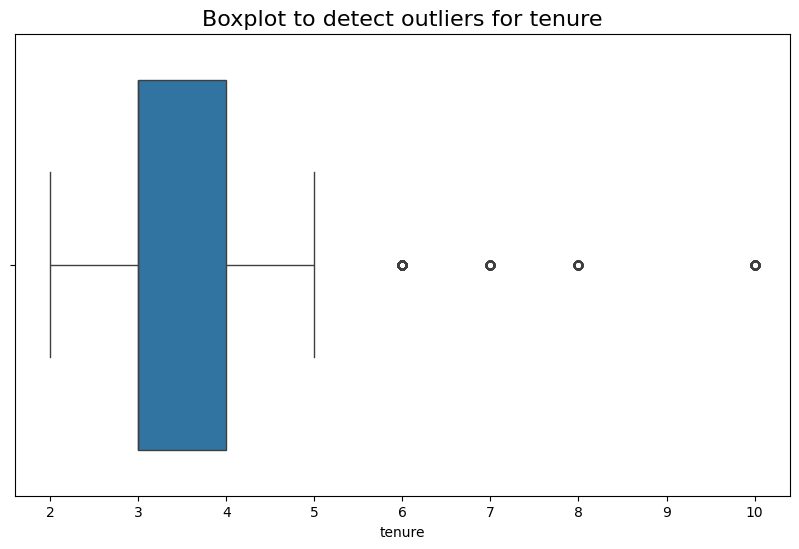

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize = (10, 6))

sns.boxplot(x = df1['time_spend_company'])

# Add label and title
plt.xlabel('tenure')
plt.title('Boxplot to detect outliers for tenure', fontsize = 16)

# Display the plot
plt.show()

In [13]:
# Determine number of rows containing outliers

'''
Outliers are considered as any value that is 1.5 x IQR greater than the third quartile and
any value that is 1.5 x IQR less than the first quartile.

Below code calculates percentiles to identify quartiles (Q1 and Q3), computes the interquartile range (IQR)
to understand the spread of the data, and establishes thresholds based on the IQR to identify potential outliers.

Detecting outliers will help in understanding the distribution of tenure and detecting any unusual observations
that may warrant further investigation.
'''

# Calculate 25th percentile in tenure
percentile25 = df1['time_spend_company'].quantile(0.25)

# Calculate 75th percentile in tenure
percentile75 = df1['time_spend_company'].quantile(0.75)

# Calculate interquantile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Upper limit is:',upper_limit)
print()
print('Lower limit is:',lower_limit)
print()

# Identify subset of data containing outliers in 'time_spend_company' variable
outliers = df1[(df1['time_spend_company'] > upper_limit) | (df1['time_spend_company'] < lower_limit)]

# Count how many rows in the data contain outliers for 'time_spend_company' variable
print("Count of rows containing outliers for tenure is:", len(outliers))

Upper limit is: 5.5

Lower limit is: 1.5

Count of rows containing outliers for tenure is: 824


In [14]:
# Use Boolean mask to select only the rows of the dataframe where tenure is more than the upper limit as calculated above,
# that is, isolate outliers on upper end
df1[df1['time_spend_company'] > upper_limit]

satisfaction_level  last_performance_evaluation  number_of_projects  \
1                    0.80                         0.86                   5   
17                   0.78                         0.99                   4   
34                   0.84                         0.87                   4   
47                   0.57                         0.70                   3   
67                   0.90                         0.98                   4   
...                   ...                          ...                 ...   
11985                0.22                         0.94                   3   
11986                0.90                         0.55                   3   
11987                0.74                         0.95                   5   
11988                0.85                         0.54                   3   
11989                0.33                         0.65                   3   

       average_monthly_hours  time_spend_company  work_accident  left_company  \
1                        262                   6              0             1   
17                       255                   6              0             1   
34                       246                   6              0             1   
47                       273                   6              0             1   
67                       264                   6              0             1   
...                      ...                 ...            ...           ...   
11985                    193                  10              0             0   
11986                    259                  10              1             0   
11987                    266                  10              0             0   
11988                    185                  10              0             0   
11989                    172                  10              0             0   

       promotion_last_five_years   department  salary  
1                              0        sales  medium  
17                             0        sales     low  
34                             0           hr     low  
47                             0      support     low  
67                             0  product_mng  medium  
...                          ...          ...     ...  
11985                          1   management    high  
11986                          1   management    high  
11987                          1   management    high  
11988                          1   management    high  
11989                          1    marketing    high  

[824 rows x 10 columns]

**Note: There are certain types of models that are sensitive to outliers. After reaching the Construct stage, consider whether to remove or keep outliers in the data depending on the type of model that will be used. **

**Responses:**
- The stakeholders for this project are the Human Resources (HR) and the senior leadership team at Salifort Motors.
- The goals for this project are to analyze the data collected by the HR department and build an effective model that predicts whether or not an employee will leave the company based on their job title, department, number of projects, average monthly hours, or any other relevant data points. By predicting employees that are likely to quit, it might be possible to identify the key factors driving employee turnover. A good predictive model will help the company increase employee retention and job satisfaction for current employees, and also save time and  money training new employees.
- During the initial observations I noticed, that the frequency of low salary is the highest, with a total of 7316 occurrences. Some of these employees had low salaries, despite their long tenure and presumably very good evaluation scores. Furthermore, the mean number of promotions was just 0.021268 which is very low. After identifying the outliers in the data for tenure, I found that some of the employees had spent years in the company, despite which they had not received any promotions in the last five years.

#**pAce: Analyze Stage**
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




##**Step 2. Data Exploration (Continue EDA)**

**Begin by understanding how many employees left the company and what percentage of all employees this figure represents.**

In [15]:
# Get numbers of employees who left vs. stayed
print("Numbers of employees who left vs. stayed:")
count_of_employees = df1['left_company'].value_counts()
print(count_of_employees)

print()

# Get percentages of employees who left vs. stayed
percent_left = (count_of_employees[1] / len(df1['left_company']) * 100)
print("Percentage of employees who left the company: {:.2f}%".format(percent_left))

print()

percent_stayed = (count_of_employees[0] / len(df1['left_company']) * 100)
print("Percentage of employees who stayed in the company: {:.2f}%".format(percent_stayed))

Numbers of employees who left vs. stayed:
left_company
0    10000
1     1991
Name: count, dtype: int64

Percentage of employees who left the company: 16.60%

Percentage of employees who stayed in the company: 83.40%


###**Data visualizations**

**Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.**

**Distribution of employees who Left vs. Stayed**

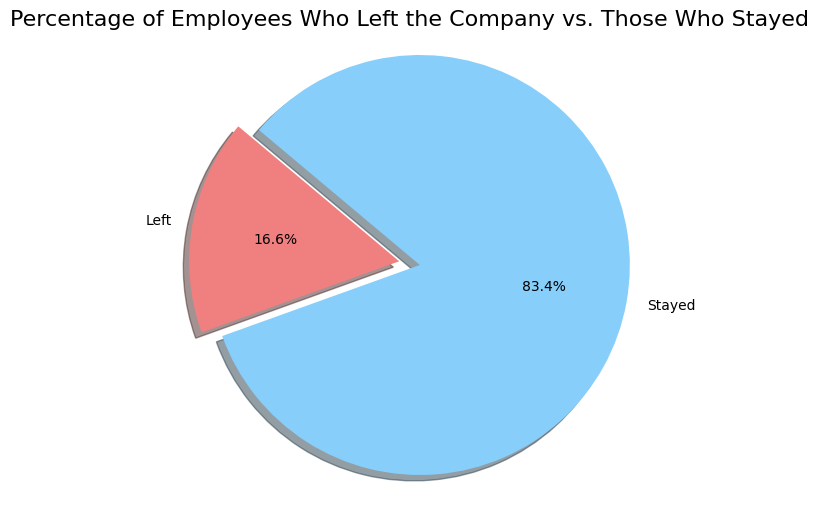

In [16]:
# Create a pie chart to represent the proportion of employees who left the company versus those who stayed

# Calculate the number of employees who left and stayed (only rows)
left_count = df1[df1['left_company'] == 1].shape[0]
stay_count = df1[df1['left_company'] == 0].shape[0]

# Design the plot
sizes = [left_count, stay_count]
labels = ['Left', 'Stayed']
colors = ['lightcoral', 'lightskyblue']

# Explode the 'Left Company' slice
explode = (0.1, 0)

# Add sizes and title
plt.figure(figsize=(10, 6))
plt.title('Percentage of Employees Who Left the Company vs. Those Who Stayed', fontsize=16)

# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Responses:**
- **16.6%** of employees left the company.
- **83.4%** of employees stayed in the company.

**Distribution of `average_monthly_hours` spent by employees working in the company**

<Figure size 1000x600 with 0 Axes>

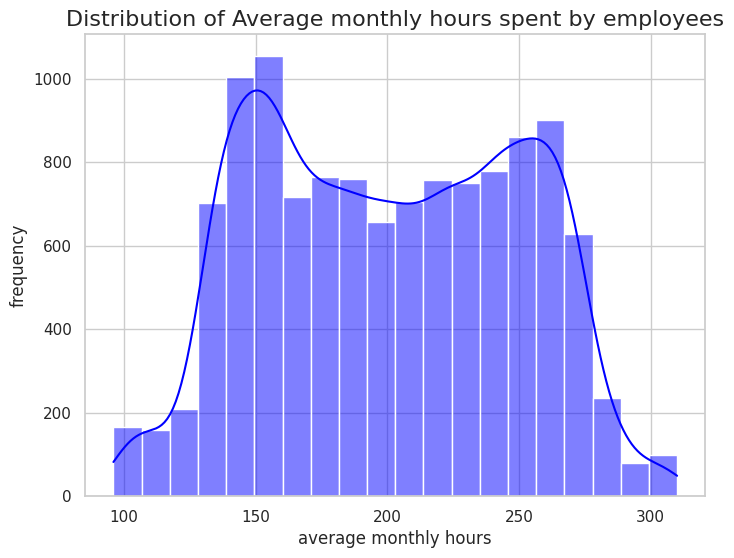

In [17]:
# Create a histogram with KDE to visualize the distribution of average monthly hours spent by employees working in the company

plt.figure(figsize=(10, 6))

# Set Seaborn style
sns.set(style='whitegrid')

# Create a combination plot with histogram and KDE
plt.figure(figsize=(8, 6))
sns.histplot(df1['average_monthly_hours'], bins=20, kde=True, color='blue')

# Add sizes, labels and title
plt.xlabel('average monthly hours')
plt.ylabel('frequency')
plt.title('Distribution of Average monthly hours spent by employees', fontsize=16)

# Display the plot
plt.show()

**Responses:**
- Average monthly hours spent by most of the employees in the company is **150** hours.

**Relationship between `average_monthly_hours` and `number_of_projects` contributed by the employees**

<ipython-input-18-2d0da47d7e6d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number_of_projects', y='average_monthly_hours', data = df1, palette="colorblind")


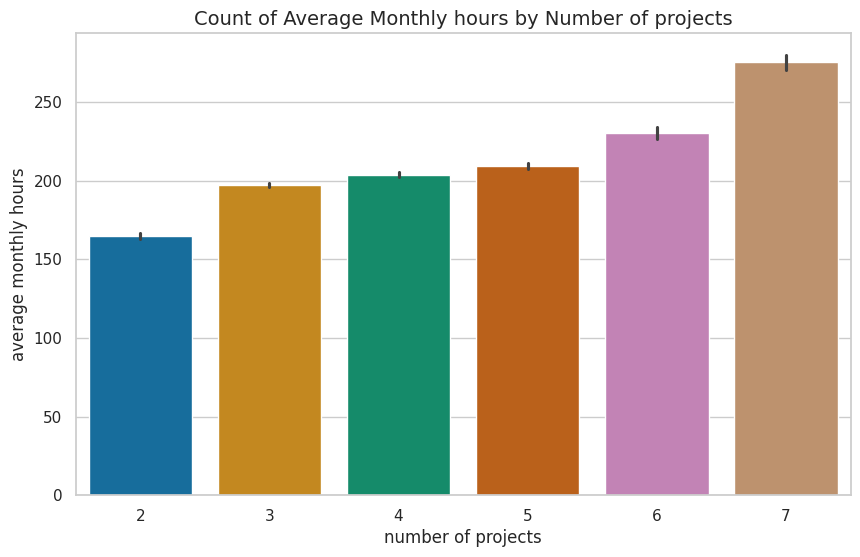

In [18]:
# Create a bar plot to visualize the relationship between Average Monthly Hours and Number of Projects

plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='number_of_projects', y='average_monthly_hours', data = df1, palette="colorblind")

# Add title and labels
plt.title('Count of Average Monthly hours by Number of projects', fontsize=14)
plt.xlabel('number of projects', fontsize=12)
plt.ylabel('average monthly hours', fontsize=12)

# Display the plot
plt.show()

**Responses:**
- Employees who work on more projects usually spend more hours working in the company.

**Examine `average_monthly_hours` distributions for `number_of_projects`, comparing the distributions of employees who left versus those who stayed.**

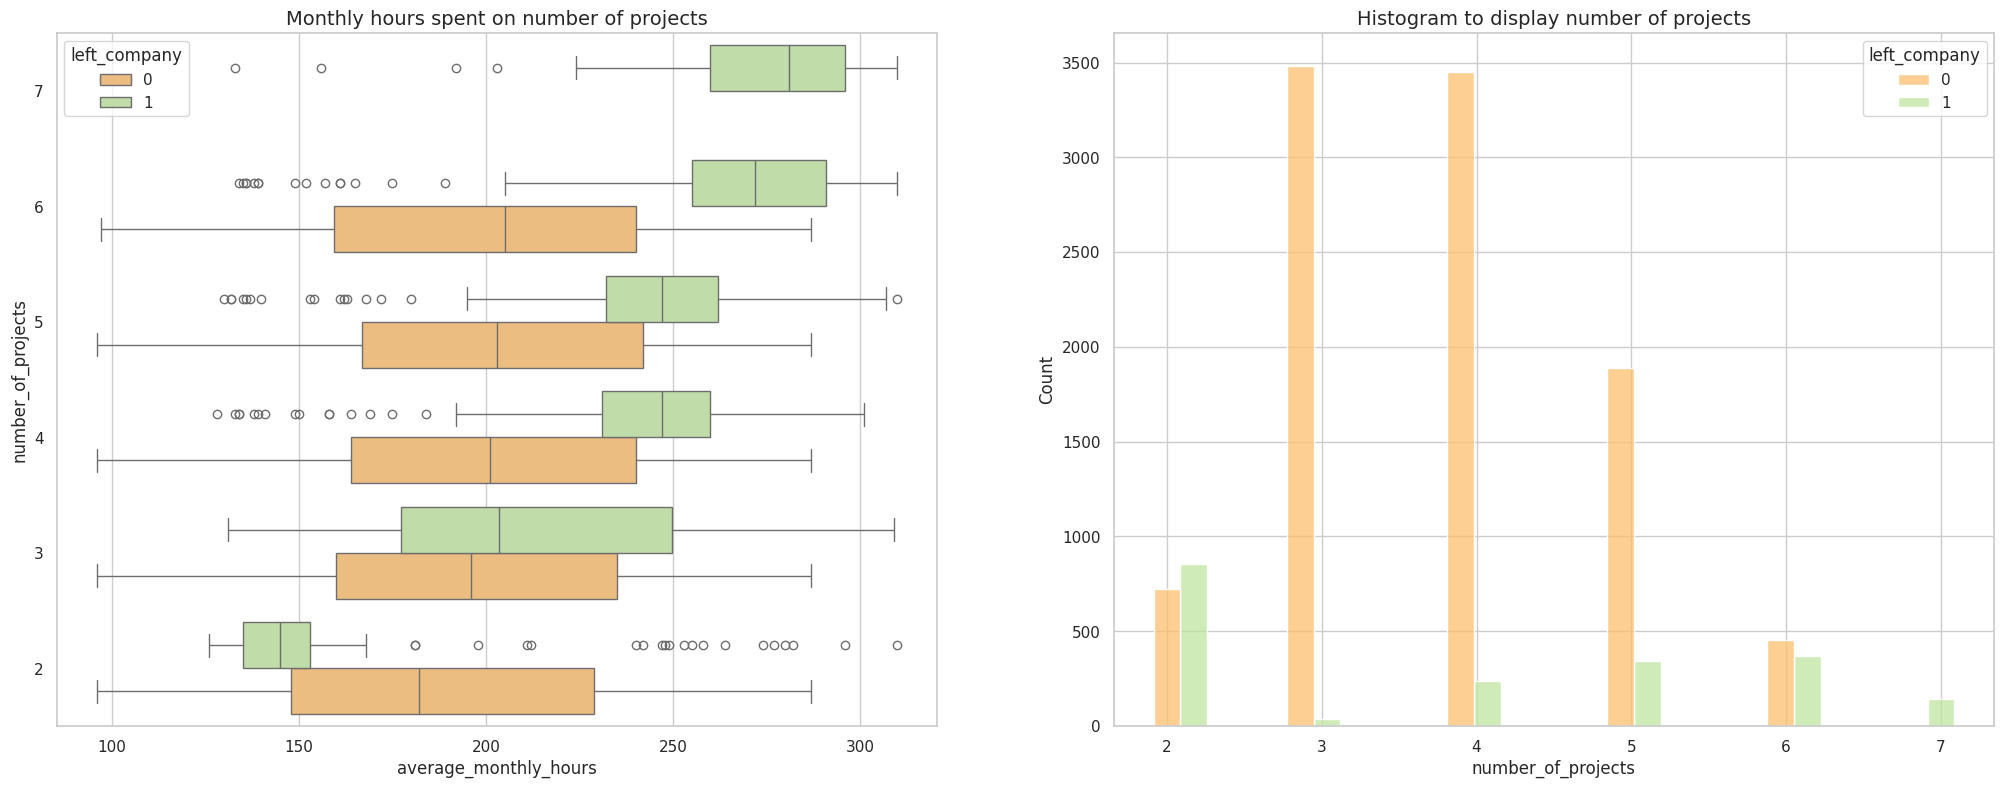

In [19]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (25, 9))

# Create boxplot showing 'average_monthly_hours' distribution for 'number_of_projects' comparing employees who stayed vs those
# left the company
sns.boxplot(data = df1,
            x = 'average_monthly_hours',
            y = 'number_of_projects',
            hue = 'left_company',
            orient = 'h',
            palette="Spectral",
            ax = ax[0])

ax[0].invert_yaxis()
ax[0].set_title("Monthly hours spent on number of projects", fontsize = '14')

'''
But, box plots can be deceiving without the context of how big the sample sizes that they represent are.
So, a stacked histogram can also be plotted to visualize the distribution of  `number_of_projects`
for those who stayed versus left.
'''

# Create histogram showing distribution of 'number_of_projects', comparing employees who stayed versus those who left
tenure_stay = df1[df1['left_company'] == 0]['number_of_projects']
tenure_left = df1[df1['left_company'] == 1]['number_of_projects']

sns.histplot(data = df1,
            x = 'number_of_projects',
            hue = 'left_company',
            multiple = 'dodge',
            shrink = 2,
            ax = ax[1],
            palette="Spectral")

ax[1].set_title("Histogram to display number of projects", fontsize = 14)

# Display the plot
plt.show()

**Responses:**
- There is a correlation between the number of projects and the hours spent working. Employees working on a number of projects tend to spend more time working on it.
- However, a few things stand out from this plot.
- There are 2 groups of employees who left the company:
      A) Those who considerably worked less than their peers with the same number of projects.
      B) Those who worked much more
- Of those in group A, it is possible that they were fired.
- Its also possible that this group includes employees who had already given their notice and were assigned fewer hours becaise they were already on their way out the door.
- For those in group B, it's reasonable to infer that they probably quit.
- They contributed to a lot of projects they worked in.
- All employees who worked on 7 projects had left. And, the interquantile range of this group and those who left with 6 projects was ~ 255-295 hours/month - much more than other group.
- The optimal number of projects for employees to work on seems to be 3-4 because the ratio of left vs. stayed is very small for these cohorts.
- If you assume a work week of 40 hours and 2 weeks of vacation per year, then the average number of working hours per month of employees working from Monday to Friday must be 166.67 hours per month. This means that, aside from the employees who worked on 2 projects, every group - even those who stayed in the company - worked considerably more hours than this.
- It seems that the employees here are overworked.

**As the next step, confirm that all employees with 7 projects left the company.**

In [20]:
# Get value counts of stayed vs. left for employees with 7 projects
df1[df1['number_of_projects'] == 7]['left_company'].value_counts()

left_company
1    145
Name: count, dtype: int64

**Responses:**
- This confirms that all the employees who had contributed to 7 projects did leave the company.

**Examine the `average_monthly_hours` versus the  `satisfaction_ levels` of the employees.**

Text(0.5, 1.0, 'Monthly hours by Satisfaction level, fontsize = 14')

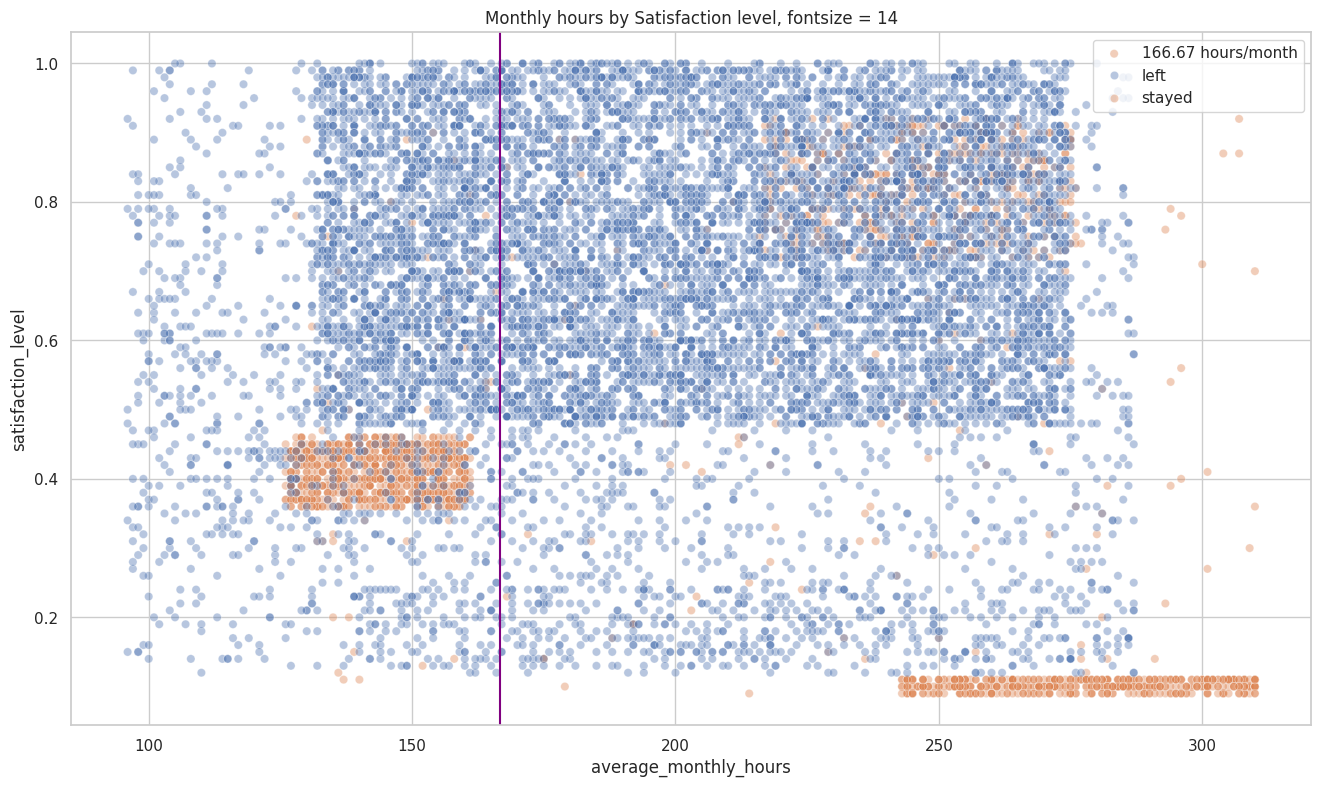

In [21]:
# Create a scatter plot of 'average_monthly_hours' versus 'satisfaction_levels', comparing employees who stayed versus
# those who left

plt.figure(figsize = (16, 9))

sns.scatterplot(data = df1,
               x = 'average_monthly_hours',
               y = 'satisfaction_level',
               hue = 'left_company',
               alpha = 0.4)

plt.axvline(x = 166.67,
            color = 'purple',
            label = '166.67 hours/month',
            ls = '-')

plt.legend(labels = ['166.67 hours/month', 'left', 'stayed'])
plt.title("Monthly hours by Satisfaction level, fontsize = 14")

**Responses:**
- There was a sizeable group of employees who worked between 240-315 hours per month which is over 75 hours per week for a whole year. It is likely that this is related to their satisfaction levels being close to 0.
- The other part of the plot shows that there were employees who had more normal working hours. Even so, their satisfaction levels was only around 0.4. It is difficult to speculate about why they might have left. It is possible that they felt the pressure to work more, considering so many of their peers worked nore. And that pressure could have lowered their satisfaction levels.
- Finally, there were a group of employees who worked for ~210-280 hours per month, and they had satisfaction levels ranging ~0.7-0.9.


**Note: The strange shape of the distributions here. This is indicative of data manipulation or synthetic data.**

**Examine the relationship between `number_of_projects`, `satisfaction_level` and `left_company`.**

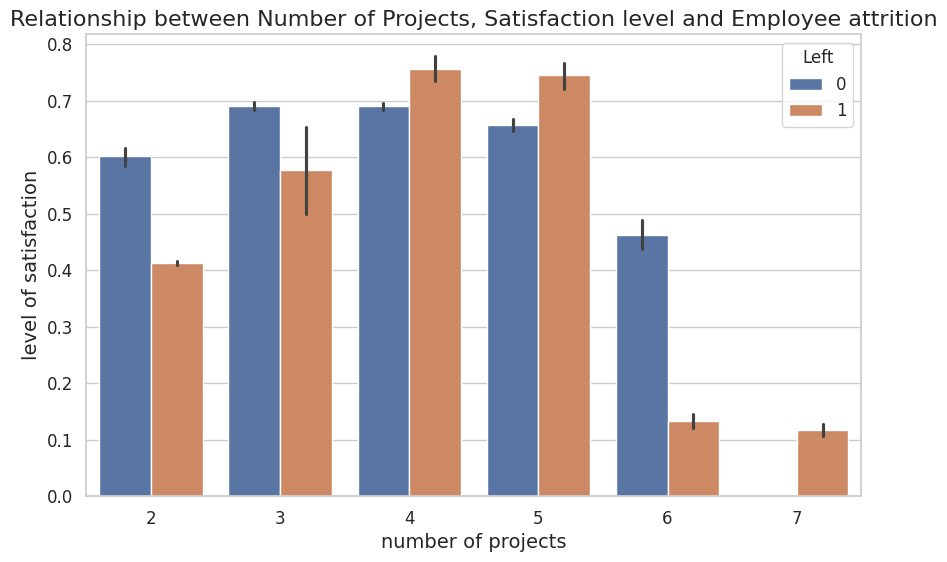

In [22]:
# Create a grouped bar plot to visualize the relationship between Number of Projects, Satisfaction level and Employee Attrition
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='number_of_projects',
            y='satisfaction_level',
            hue='left_company',
            data=df1)

# Add labels and title
plt.title('Relationship between Number of Projects, Satisfaction level and Employee attrition', fontsize=16)
plt.xlabel('number of projects', fontsize=14)
plt.ylabel('level of satisfaction', fontsize=14)

# Design the plot
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set color
sns.color_palette("Spectral", as_cmap=True)

plt.legend(title='Left', fontsize=12)

# Display the plot
plt.show()

**Responses:**
- In the previous results, it was clear that, the employeees who had contributed to more projects spent more hours working in the company as compared to the other employees working in the company.
- The above bar plot shows that, the employees who contributed into large number of projects were poorly satisfied and therefore had left the company.

**Distribution of employee's `salary`**

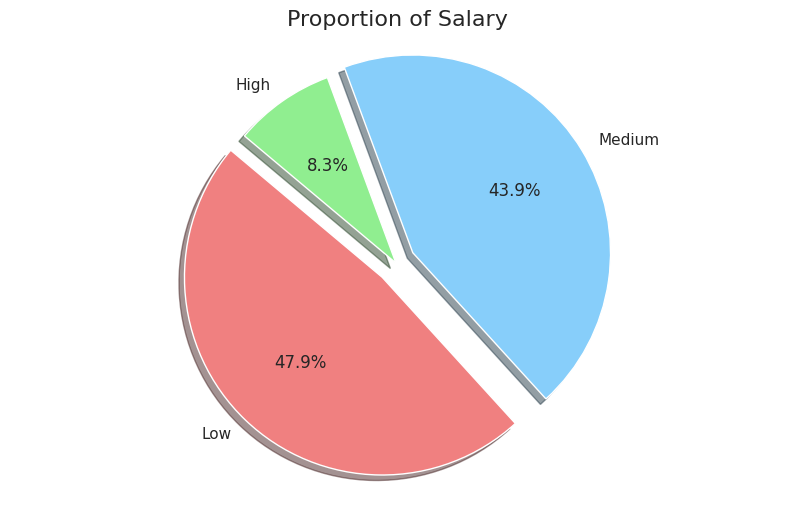

In [23]:
# Create a pie chart to represent the salary distribution of employees in the company

# Calculate the number of salary (low, medium, high)
low = df1[df1['salary'] == 'low'].shape[0]
medium = df1[df1['salary'] == 'medium'].shape[0]
high = df1[df1['salary'] == 'high'].shape[0]

# Design the plot
sizes = [low, medium, high]
labels = ['Low', 'Medium', 'High']
colors = ['lightcoral', 'lightskyblue', 'lightgreen']

# Explode the 'Salary' slice
explode = (0.1, 0.1, 0)

# Add sizes and title
plt.figure(figsize=(10, 6))
plt.title('Proportion of Salary', fontsize=16)

# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Responses:**
- About **47.9%** of the employees are being paid low salary.

**Examine the relationship between Salary and Employee Attrition**

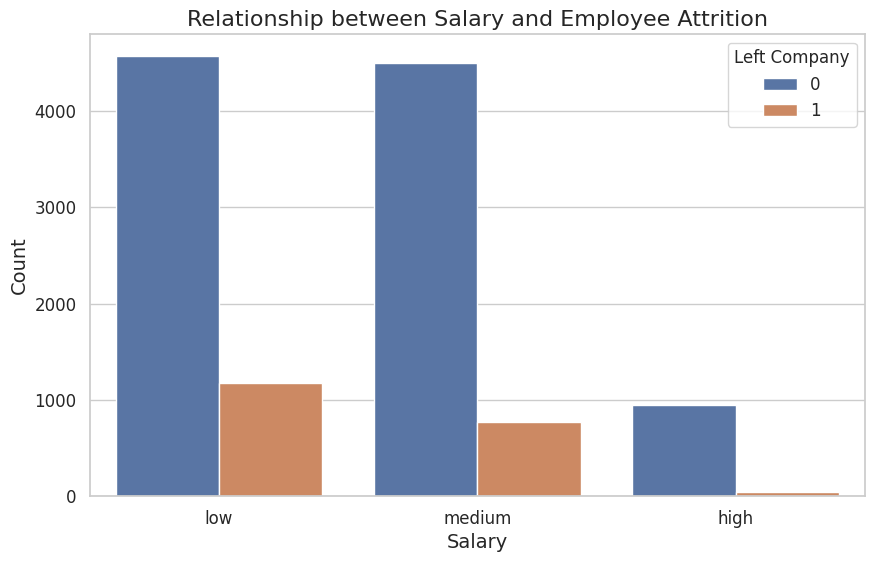

In [24]:
# Create a count plot for Salary and Employee Attrition

plt.figure(figsize=(10, 6))

# Create a count plot
sns.countplot(x='salary', hue='left_company', data=df1)

# Add labels and title
plt.title('Relationship between Salary and Employee Attrition', fontsize=16)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Design the plot
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Left Company', fontsize=12)

sns.set_style("whitegrid")
custom_palette = ["#B39CD0", "#FCCB7E", "#A2D2FF", "#FF9AA2"]
sns.set_palette(custom_palette)

# Design the plot
plt.show()

**Responses:**
- Employees who were paid less salary were more likely to leave the company.

**Examine the relationship between `average_monthly_hours`, `number_of_projects`, and `salary`**

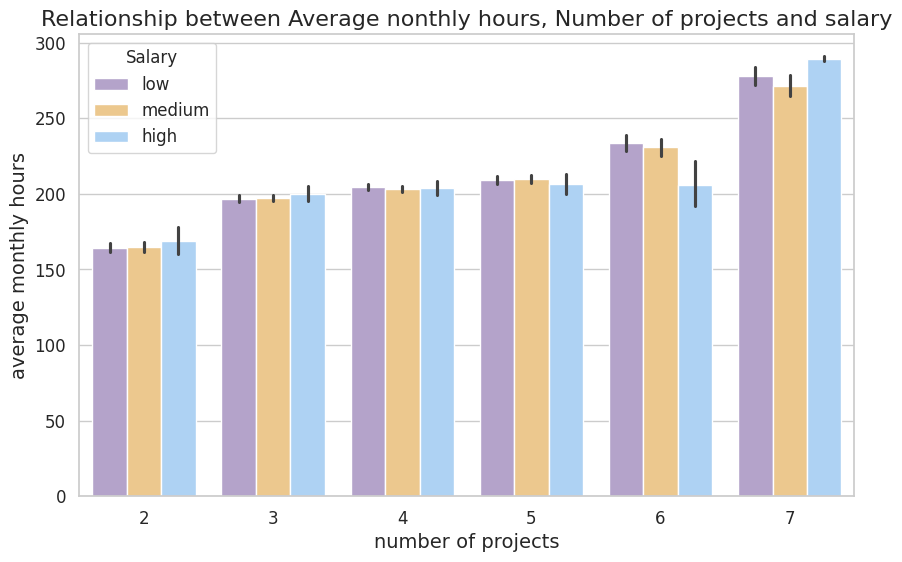

In [25]:
# Create a grouped bar plot to visualize the relationship between Average Monthly Hours, Number of Projects and Salary
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='number_of_projects', y='average_monthly_hours',
            hue='salary',
            data=df1)

# Add labels and title
plt.title('Relationship between Average nonthly hours, Number of projects and salary', fontsize=16)
plt.xlabel('number of projects', fontsize=14)
plt.ylabel('average monthly hours', fontsize=14)

# Design the plot
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set color
sns.color_palette("Spectral", as_cmap=True)

plt.legend(title='Salary', fontsize=12)

# Display the plot
plt.show()

**Responses:**
- Employees working on more number of projects spend more working hours in the company and has considerably high salary compared to those working for a few number of projects.

**Examine salary levels for different tenure**

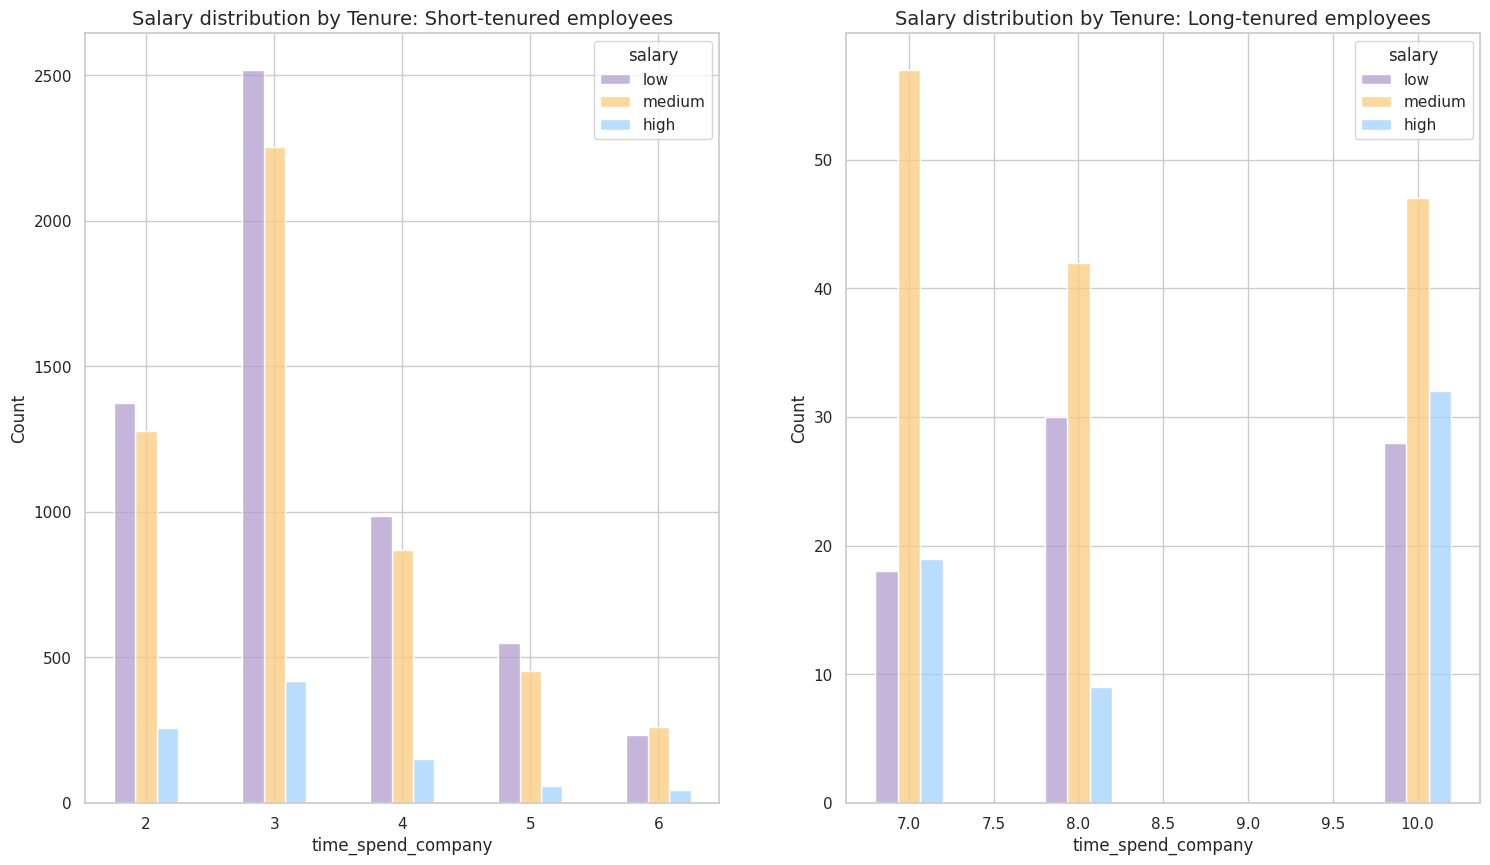

In [26]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (18, 10))

# Define short-tenured employees
short_tenure = df1[df1['time_spend_company'] < 7]

# Plot short-tenured histogram
sns.histplot(data = short_tenure,
            x = 'time_spend_company',
            hue = 'salary',
            hue_order = ['low', 'medium', 'high'],
            discrete = 1,
            multiple = 'dodge',
            shrink = .5,
            ax = ax[0])

ax[0].set_title("Salary distribution by Tenure: Short-tenured employees", fontsize = '14')

# Define long-tenured employees
long_tenure = df1[df1['time_spend_company'] > 6]

# Plot long-tenured histogram
sns.histplot(data = long_tenure,
            x = 'time_spend_company',
            hue = 'salary',
            hue_order = ['low', 'medium', 'high'],
            discrete = 1,
            multiple = 'dodge',
            shrink = .4,
            ax = ax[1])

ax[1].set_title("Salary distribution by Tenure: Long-tenured employees", fontsize = '14')

# Display the plot
plt.show()

**Responses:**
- The above plot shows that employees who have been with the company for a longer period are not necessarily receiving higher salaries compared to those who have been with the company for a shorter duration.
- This observation is important because it indicates that tenure alone may not be a reliable predictor of salary level within the company.
- It suggests that other factors may have a stronger influence on determining employee salaries.

**Examine the relationship between `time_spend_company` and `satisfaction_level`**

<ipython-input-27-01293ec8b88b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_spend_company', y='satisfaction_level', data = df1, palette='pastel')


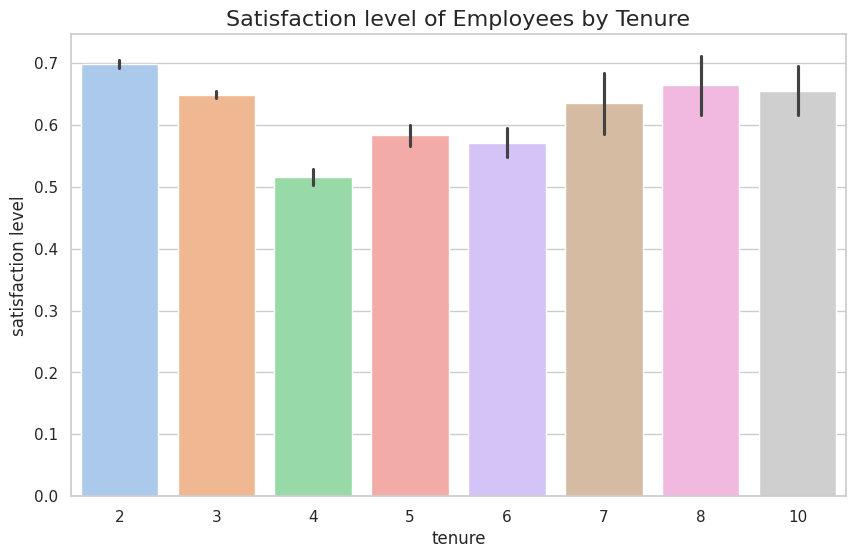

In [27]:
# Create a bar plot to visualize the relationship between Tenure and Satisfaction level
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='time_spend_company', y='satisfaction_level', data = df1, palette='pastel')

# Add labels and title
plt.xlabel('tenure')
plt.ylabel('satisfaction level')
plt.title('Satisfaction level of Employees by Tenure', fontsize=16)

# Display the plot
plt.show()

**Responses:**
- The satisfaction level of employees who spent 4 years in the company has the lowest satisfaction level.

**Examine distribtions of `satisfaction_level` by `time_spend_company`, comparing employees who stayed versus those who left the company**

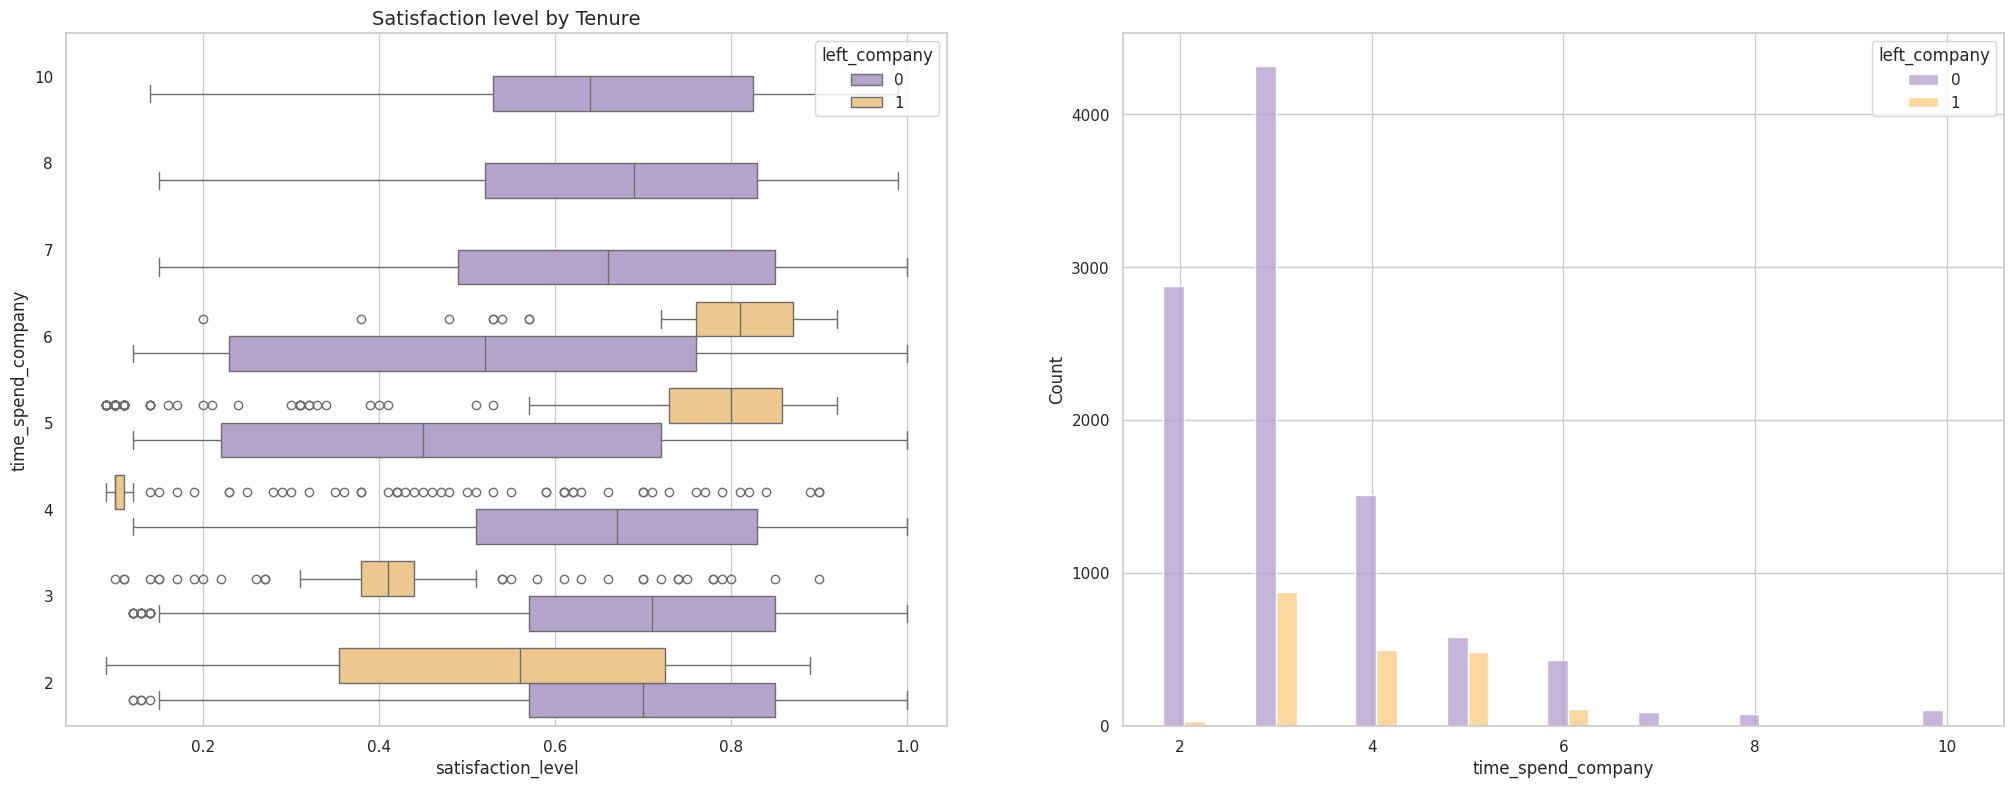

In [28]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (25, 9))

# Create a boxplot showing distribtions of satisfaction_level by tenure, comparing employees who stayed versus those who left
sns.boxplot(data = df1,
           x = 'satisfaction_level',
           y = 'time_spend_company',
           hue = 'left_company',
           orient = 'h',
           ax = ax[0])

ax[0].invert_yaxis()
ax[0].set_title("Satisfaction level by Tenure", fontsize = 14)

'''
But, box plots can be deceiving without the context of how big the sample sizes that they represent are. So, a stacked histogram
can also be plotted to visualzie the distribution of  `time_spend_company` for those who stayed versus left.
'''

# Create a histogram showing distribution of tenure, comparing employees those who left versus those who left
tenure_stay = df1[df1['left_company'] == 0]['time_spend_company']
tenure_left = df1[df1['left_company'] == 1]['time_spend_company']

sns.histplot(data = df1,
            x = 'time_spend_company',
            hue = 'left_company',
            multiple ='dodge',
            shrink = 5,
            ax = ax[1])

# Display the plot
plt.show()

**Responses:**
- Employees who left fall into 2 general categories:
      A) Dissatisfied employees with shorter tenures
      B) Very satisfied employees with medium-length tenures.
- Employees with 4 years tenure had the lowest satisfaction level and seem to have left the company. It is worth investigating changes to company policy that might have affected people specifically at the 4 year mark, if possible.
- Employees who spent the longest years did not leave the company. It is possible that they are the higher-ranking, higher-paid employees.

**As the next step, calculate the mean and median satisfaction scores of employees who left vs. those who stayed.**

In [29]:
# Calculate the mean and median satisfaction scores of employees who left versus those who stayed
df1.groupby(['left_company'])['satisfaction_level'].agg([np.mean, np.median])

<ipython-input-29-e984feab2996>:2: FutureWarning: The provided callable <function mean at 0x7d8d0550fd00> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby(['left_company'])['satisfaction_level'].agg([np.mean, np.median])
<ipython-input-29-e984feab2996>:2: FutureWarning: The provided callable <function median at 0x7d8d04f4b400> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby(['left_company'])['satisfaction_level'].agg([np.mean, np.median])


mean  median
left_company                  
0             0.667365    0.69
1             0.440271    0.41

- As expected, the mean and median satisfaction scores are lower than those employees who stayed in the company.
- Among employees who stayed, the mean satisfaction score is slightly below than the median satisfaction score.
- This indicates that the satisfaction levels among those who stayed might be skewed to the left.

**Examine whether employees got promotion and if they had left or stayed in the company**

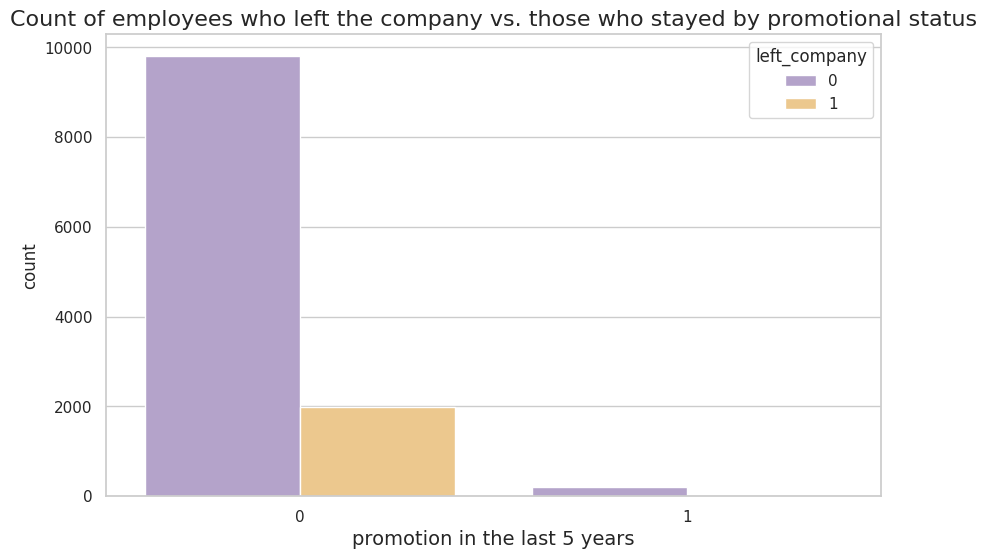

In [30]:
# Create a countplot for employees promotion status in the last 5 years and those left the company vs. stayed

plt.figure(figsize=(10, 6))

# Create a count plot
sns.countplot(x='promotion_last_five_years', hue='left_company', data=df1)

# Design the plot
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Add label and title
plt.xlabel('promotion in the last 5 years', fontsize=14)
plt.title('Count of employees who left the company vs. those who stayed by promotional status', fontsize=16)

# Display the plot
plt.show()

**Responses:**
- Employees who didn't receive any promotion has left the company.

**Examine whether employees who worked very long hours were promoted in the last five years.**

Text(0.5, 1.0, 'Monthly hours by promotion last 5 years')

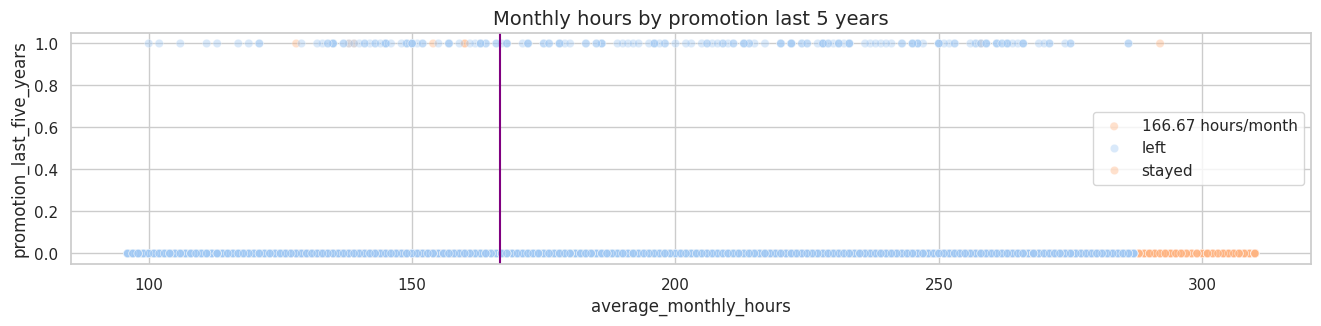

In [31]:
# Create a scatterplot to examine relationship between 'average_monthly_hours' and 'promotion_last_five_years'
plt.figure(figsize = (16, 3))

sns.scatterplot(data = df1,
               x = 'average_monthly_hours',
               y = 'promotion_last_five_years',
               hue = 'left_company',
               alpha = 0.4)

plt.axvline(x = 166.67,
           color = 'purple',
           ls = '-')

plt.legend(labels = ['166.67 hours/month', 'left', 'stayed'])
plt.title("Monthly hours by promotion last 5 years", fontsize = '14')

**Responses:**
- Very few employees who were promoted in the last 5 years left the company.
- Very few employees who worked the longest hours were promoted.
- All of the employees who left were working the longest hours.

**Examine the relationship between `number_of_projects`, `last_performance_evaluation` and `left_company`.**

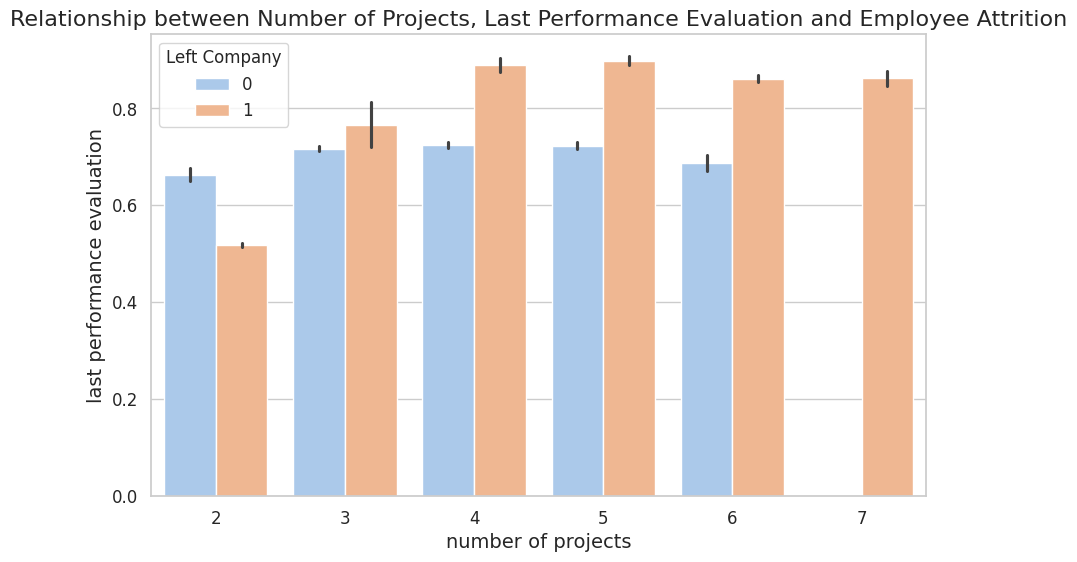

In [32]:
# Create a grouped bar plot to visualize the relationship between Number of Projects, Last Performance Evaluation and
# Employee Attrition

plt.figure(figsize=(10,6))

# Create a bar plot
sns.barplot(x='number_of_projects',
            y='last_performance_evaluation',
            hue='left_company',
            data=df1)

# Add labels and title
plt.title('Relationship between Number of Projects, Last Performance Evaluation and Employee Attrition', fontsize=16)
plt.xlabel('number of projects', fontsize=14)
plt.ylabel('last performance evaluation', fontsize=14)

# Design the plot
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set sns style
sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.legend(title='Left Company', fontsize=12)

# Display the plot
plt.show()

**Responses:**
- Employees who worked for more projects did recieve a good evaluation score, but stil they chose to leave the company.

**Explore whether there is a correlation between longer working hours and receiving high evaluation scores**

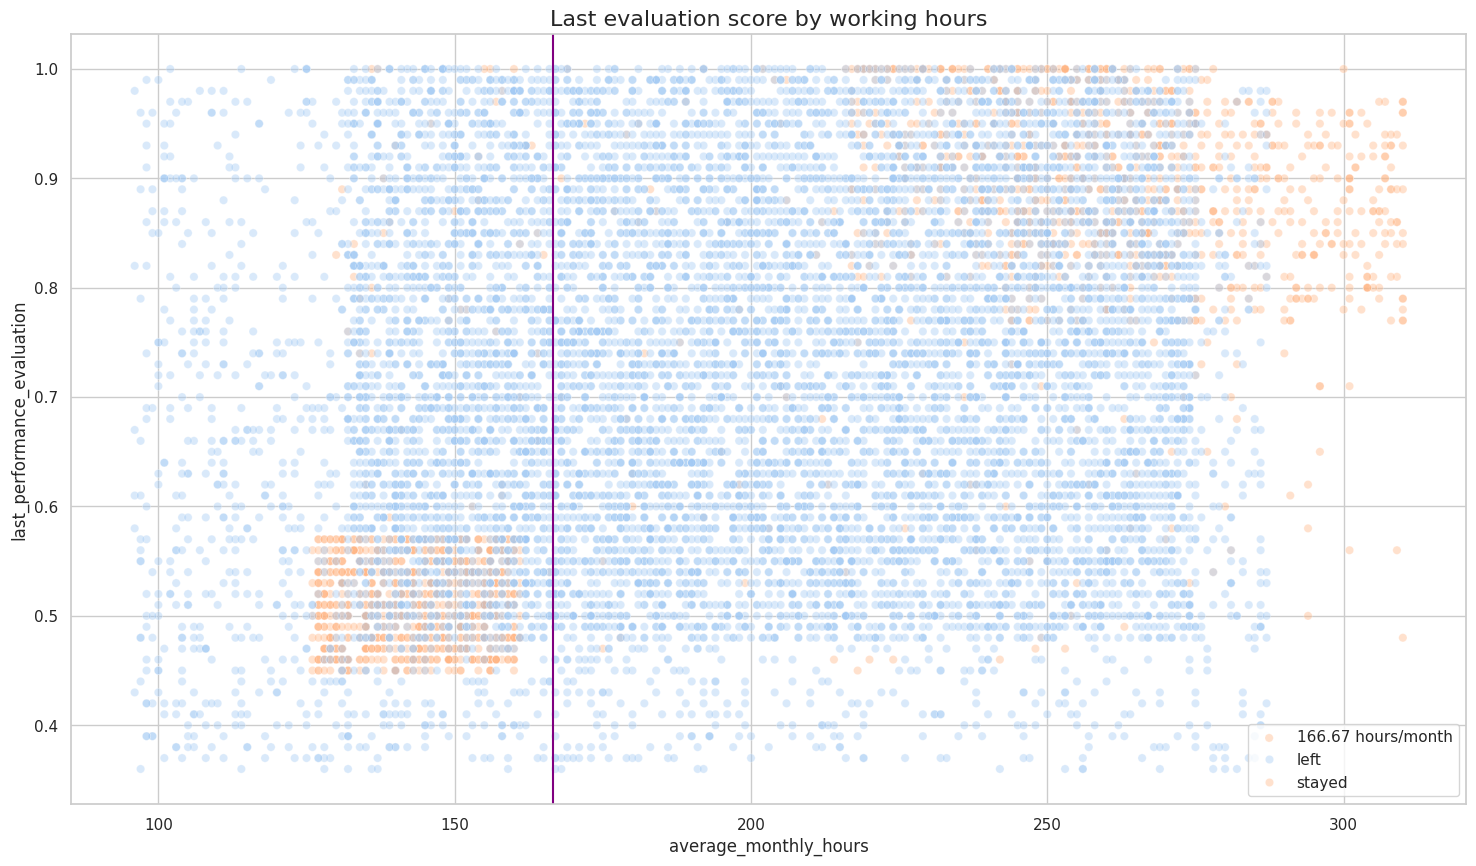

In [33]:
# Create a scatterplot of 'average_monthly_hours' versus last_performance_evaluation

plt.figure(figsize = (18, 10))

sns.scatterplot(data = df1,
               x = 'average_monthly_hours',
               y = 'last_performance_evaluation',
               hue = 'left_company',
               alpha = 0.4)

plt.axvline(x = 166.67,
            color = 'purple',
            label = '166.67 hours/month',
            ls = '-')

plt.legend(labels = ['166.67 hours/month', 'left', 'stayed'])
plt.title("Last evaluation score by working hours", fontsize = '16')

# Display the plot
plt.show()

**Responses:**
- The scatterplot indicates 2 groups of employees who left the company:
      
      A) Employees who worked slightly under the nominal monthly average of 166.67 with lower evaluation scores.
      B) Overworked employees who performed very well.
- There seems to be a correlation between hours worked and evaluation scores.
- There isn't a high percentage of employees in the upper left quadrant of this plot.
- But, working long hours does not guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours/month.

**Examine the relationship between promotional status of employees and their tenure**

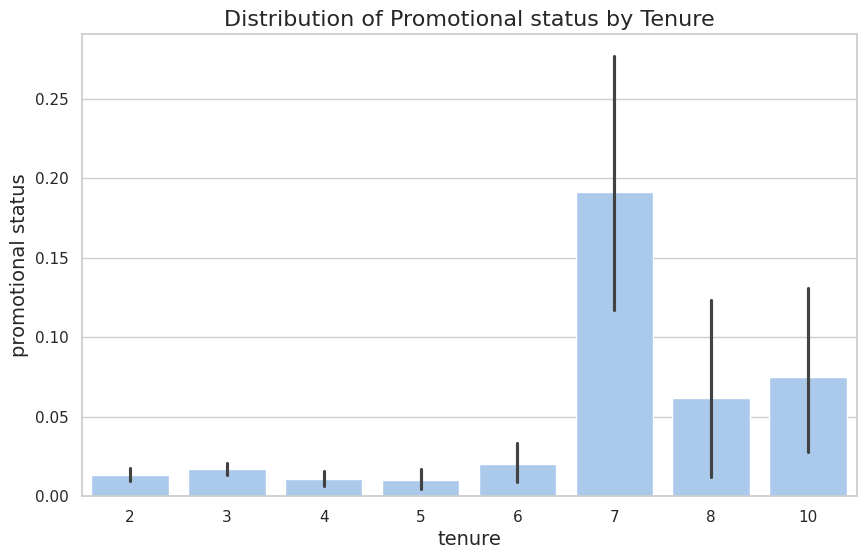

In [34]:
# Create a bar plot for employees promotion in the last five years by tenure

plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='time_spend_company', y='promotion_last_five_years', data=df1)

# Add title and labels
plt.title('Distribution of Promotional status by Tenure', fontsize=16)
plt.xlabel('tenure', fontsize=14)
plt.ylabel('promotional status', fontsize=14)

# Design the plot
sns.set_style("whitegrid")
custom_palette = ["#B39CD0", "#FCCB7E", "#A2D2FF", "#FF9AA2"]
sns.set_palette(custom_palette)

# Display the plot
plt.show()

**Responses:**
- Employees who spend 7 years in the company has received the highest promotion in the company.  
- Employees who spent more than 7 years has not received as much promotion compared to those who spent 7 years.
- Very few employees has received promotion in the last 5 years.

**Inspect how many employees who left are distributed across departments**

In [35]:
df1['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

Text(0.5, 1.0, 'Counts of employees who stayed/left by department')

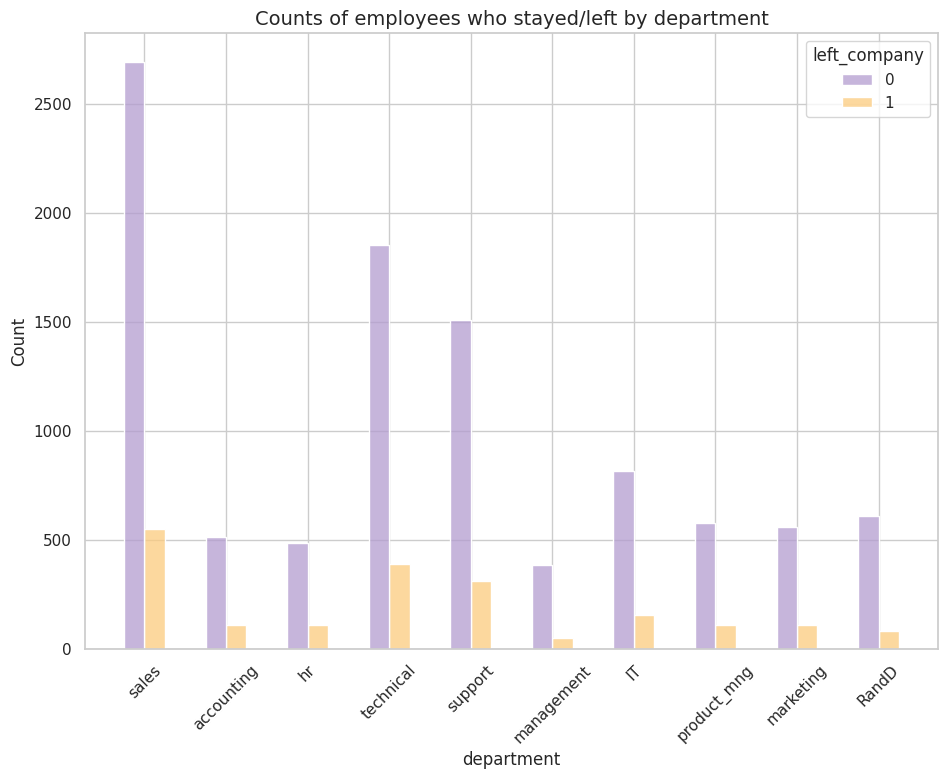

In [37]:
# Create a stacked histogram to compare department distribution of employees who left to that of employee who didn't

plt.figure(figsize = (11,8))

sns.histplot(data = df1,
            x = 'department',
            hue = 'left_company',
            discrete = 1,
            hue_order = [0, 1],
            multiple = 'dodge',
            shrink = .5)

plt.xticks(rotation = 45)
plt.title("Counts of employees who stayed/left by department", fontsize = '14')

**Responses:**
- There doesn't seem to be any department that differs significantly in it's proportion of employees  who left to those who stayed in the company.

**Lastly, check whether there are strong correlations between variables in the data**

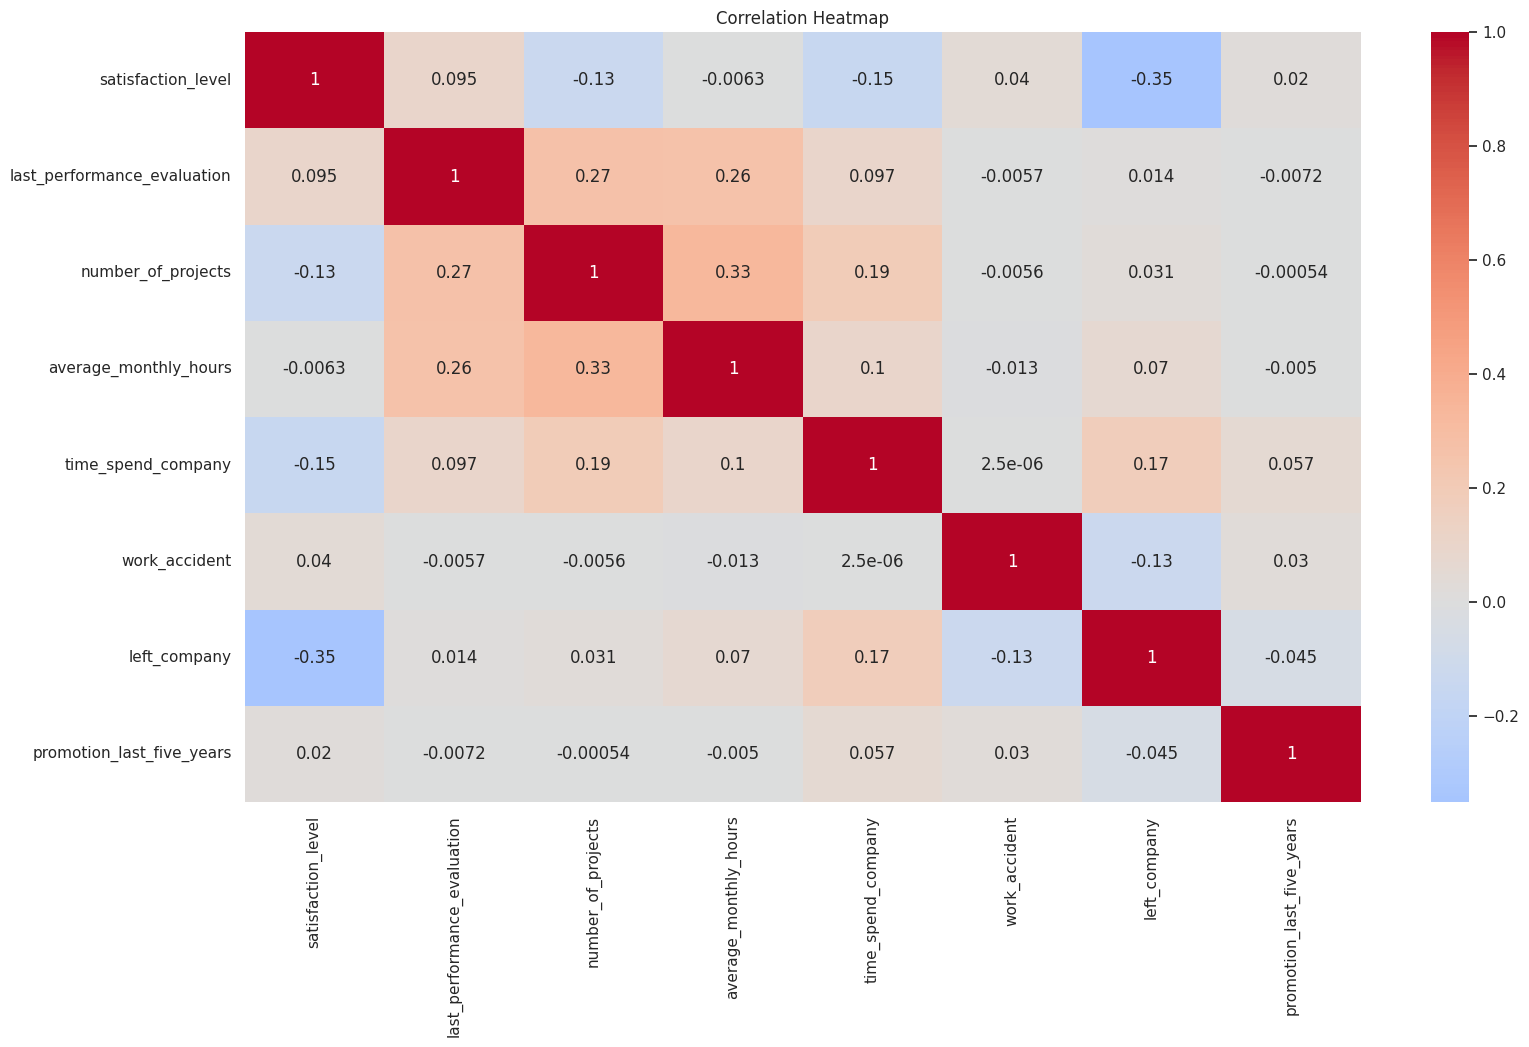

In [43]:
# Calculate correlation matrix
# correlation_matrix = df1.corr()

# Select only the numeric columns
numeric_df1 = df1.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df1.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(18, 10))

# Create heatmap with annotations and colormap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Add title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

**Responses:**
- The above correlation heatmap shows a relationship between 3 variables that is `average_monthly_hours`, `number_of_projects`, and `last_performance_evaluation`.
- This confirms that, employees who contribute more working hours and number of projects receives a good evaluation score.

###**Insights**

💭
### Reflect on these questions as you complete the analyze stage.


**What did you observe about the relationships between variables?**


**What do you observe about the distributions in the data?**



- Most employees spend around 150-160 hours per month at work, with a correlation between the number of projects and working hours. Those working on more projects tend to spend more time at work.
- Two distinct groups of employees who left the company were identified: those who worked considerably less and those who worked significantly more than their peers.
- It's plausible that those who worked less may have been fired or had already given notice and were assigned fewer hours.
- Conversely, those who worked more likely quit.
- Employees who left often worked on a high number of projects, with all employees who worked on 7 projects having left.
- The optimal number of projects for employee retention appears to be 3-4.
- Many employees, even those who stayed, worked considerably more hours than the assumed standard of 166.67 hours per month.
- There is a sizeable group of employees working exceptionally long hours, which likely contributed to their low satisfaction levels.
- The analysis also suggests that tenure alone may not predict salary levels within the company.
- Employees with 4 years of tenure had the lowest satisfaction levels and were more likely to leave.
- Employees who didn't receive promotions were more likely to leave, especially those who worked long hours.
- The scatterplot indicates two main groups of employees who left: those who worked fewer hours with lower evaluation scores and overworked employees who performed well.
- Working long hours doesn't guarantee a good evaluation score, with most employees working well over 167 hours per month.
- Employees with seven years of tenure received the highest promotions, while those with longer tenures didn't receive as many promotions.
- There's no significant difference in the proportion of employees leaving between departments.
- The correlation heatmap confirms that employees who contribute more hours and projects receive better evaluation scores.

There is dissatisfaction due to poor management practices, including:
- Low pay despite long working hours and extensive project involvement,
- Lack of promotions, and burnout among employees leading to lower satisfaction levels
- Employees with longer tenures are less likely to leave, suggesting some level of stability or satisfaction among more seasoned employees.



**What transformations did you make with your data? Why did you chose to make those decisions?**


- In preprocessing the data, duplicated values were removed. This decision was made to ensure that each observation in the dataset represents a unique employee record.



**What are some purposes of EDA before constructing a predictive model?**


- To understand the relationships and patterns within the data.
- To identify anomalies or outliers that may affect model performance.
- To explore potential correlations between variables.
- To gain insights into feature importance and potential predictors for the target variable.
- To inform data preprocessing steps and feature engineering strategies.



**What resources do you find yourself using as you complete this stage? (Make sure to include the links.)**


- Data visualization libraries such as Matplotlib and Seaborn.
- Pandas for data manipulation and analysis.
- Statistical methods and techniques for exploring data distributions and relationships.



**Do you have any ethical considerations in this stage?**


- Ensuring fairness and transparency in model development and deployment.
- Addressing potential biases in the data and algorithms.
- Protecting user privacy and sensitive information.
- Considering the impact of model predictions on individuals and society.

#**paCe: Construct Stage**
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
##**Model assumptions**

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



##**Step 3. Model Building, Step 4. Results and Evaluation**
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

###**Identify the type of prediction task.**

- The goals in this project are:
    - **To analyze the data**
    - **To build a model that predicts whether or not an employee will leave the company.**


- This type of prediction indicates that the outcome is a categorical type of variable.
- Categorical outcome variable indicates that this is a classification task.
- More specifically, it is a binary type of classification task, since the outcome variable is `left_company` that contains values either as 0 or 1.
    - **'0' -> employee stayed in the company.**
    - **'1' -> employee left the company.**


###**Identify the types of models most appropriate for this task.**

- Since this is a classification type of task, the models most appropriate to build would be a **`Logistic Regression`** model, or a Tree-based model, that is **`Decision Tree`, `Random Forest`** and **`XGBoost`**.

###**Metrics most suited to evaluating these types of models.**

- As this is a binary classification problem, it will be important to evaluate not just `accuracy`, but the balance of false positives and false negatives that the model's predictions provide. Therefore, `precision`, `recall`, and ultimately the `F1` score will be excellent metrics to use.
- The `ROC AUC` score is also suited to these types of modeling.    

###**Modeling**

###**Modelling approach A: Logistic Regression Model**

This approach covers implementation of Logistic Regression.

- Binomial logistic regression suits this task because it involves binary type of classification.
- Prepare this data to be suitable for a logistic regression model.
- This includes:
      A) Encoding the data
      B) Renaming a column
      C) Creating the training and testing data
- Before splitting the data, encode the non-numeric variables.
- There are two non-numeric variables: `department` and `salary`.  
    - `department` is a categorical variable, which means you can dummy it for modeling.
    - `salary` is categorical too, but it is ordinal. There is a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0-2.
- By encoding non-numeric variables before splitting the data and training the logistic regression model, you ensure that the model can effectively learn from all available data and make accurate predictions.
- Encoding is a necessary preprocessing step to prepare the data for logistic regression modeling.

**Note: Logistic regression models accepts numeric data.**

**Keep 'df1' as the original dataframe and create a copy 'df' where changes will go**

In [44]:
# Copy the dataframe
df_enc = df1.copy()

**Preprocess the data in 'df_enc' variable**

In [45]:
# Encode categorical variables - 'salary' and 'department'

# Encode the 'salary' column as an ordinal numeric category
df_enc['salary'] = (df_enc['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes)

# Dummy encode the 'department' column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

satisfaction_level  last_performance_evaluation  number_of_projects  \
0                0.38                         0.53                   2   
1                0.80                         0.86                   5   
2                0.11                         0.88                   7   
3                0.72                         0.87                   5   
4                0.37                         0.52                   2   

   average_monthly_hours  time_spend_company  work_accident  left_company  \
0                    157                   3              0             1   
1                    262                   6              0             1   
2                    272                   4              0             1   
3                    223                   5              0             1   
4                    159                   3              0             1   

   promotion_last_five_years  salary  department_IT  department_RandD  \
0                          0       0          False             False   
1                          0       1          False             False   
2                          0       1          False             False   
3                          0       0          False             False   
4                          0       0          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  
0               False                 False  
1               False                 False  
2               False                 False  
3               False                 False  
4               False                 False

**Examine the correlation between variables**  

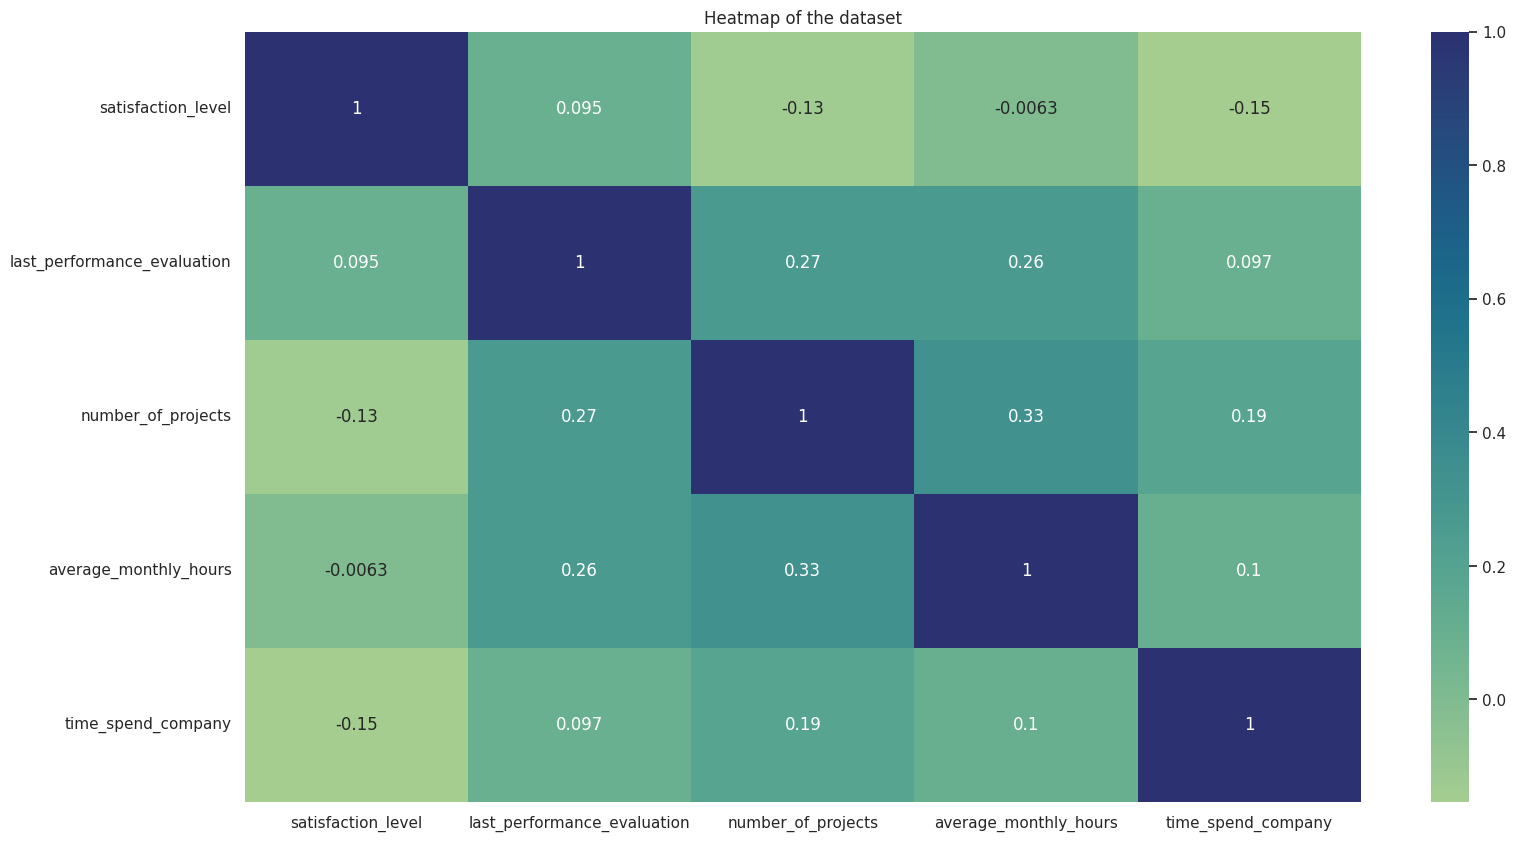

In [46]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(18, 10))

sns.heatmap(df_enc[['satisfaction_level', 'last_performance_evaluation', 'number_of_projects', 'average_monthly_hours',
                    'time_spend_company']].corr(), annot=True, cmap="crest")

# Add title
plt.title("Heatmap of the dataset")

# Display the plot
plt.show()

**Responses:**
- There seems to be a correlation between `average_monthly_hours`, `number_of_projects` and `last_performance_evaluation`.

**Visualize number of employees across department, comparing those who left with those who didn't.**

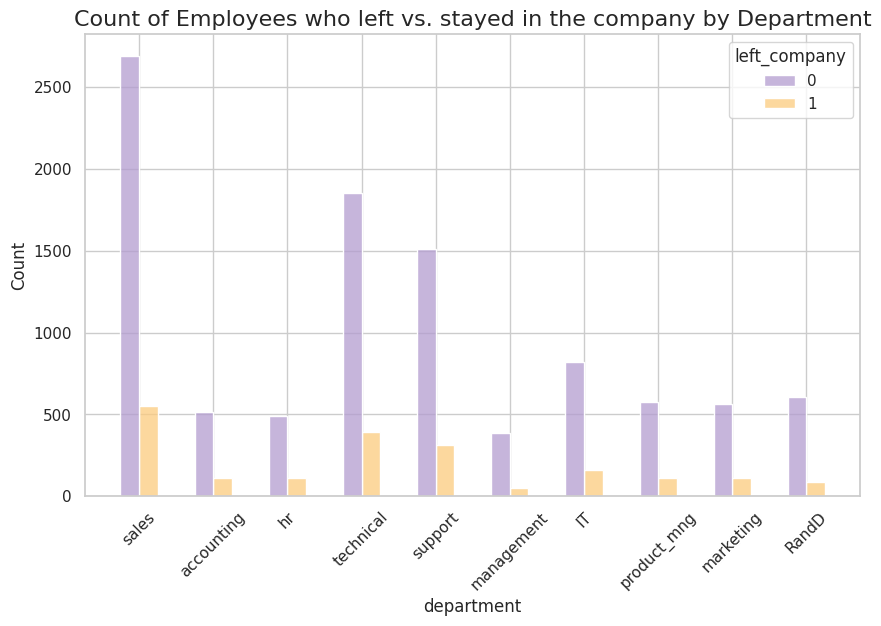

In [48]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't

plt.figure(figsize=(10,6))

# Create a stacked histogram
sns.histplot(x = 'department', hue = 'left_company', discrete = 1, hue_order = [0, 1], multiple = 'dodge', shrink = .5,
             data = df1)

# Design,add labels and title
plt.xticks(rotation = 45)
plt.title('Count of Employees who left vs. stayed in the company by Department', fontsize = 16)

# Design the plot
sns.set_style("whitegrid")
custom_palette = ["#B39CD0", "#FCCB7E"]
sns.set_palette(custom_palette)

# Display the plot
plt.show()

**Note: Logistic regression is sensitive to outliers. Therefore, it would be  good idea to remove outliers in the `time_spend_company` column that were identified earlier.**

In [49]:
# Select rows without outliers in 'time_spend_company' and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['time_spend_company'] >= lower_limit) & (df_enc['time_spend_company'] <= upper_limit)]
df_logreg.head()

satisfaction_level  last_performance_evaluation  number_of_projects  \
0                0.38                         0.53                   2   
2                0.11                         0.88                   7   
3                0.72                         0.87                   5   
4                0.37                         0.52                   2   
5                0.41                         0.50                   2   

   average_monthly_hours  time_spend_company  work_accident  left_company  \
0                    157                   3              0             1   
2                    272                   4              0             1   
3                    223                   5              0             1   
4                    159                   3              0             1   
5                    153                   3              0             1   

   promotion_last_five_years  salary  department_IT  department_RandD  \
0                          0       0          False             False   
2                          0       1          False             False   
3                          0       0          False             False   
4                          0       0          False             False   
5                          0       0          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   
5                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   
5                 False                   False              True   

   department_support  department_technical  
0               False                 False  
2               False                 False  
3               False                 False  
4               False                 False  
5               False                 False

**Select the features you want to use in the model. Consider which variables will help you to predict the outcome variable `left_company`.**

**Isolate the outcome variable, which is the variable you want your model to predict.**

**Set X and y variables.**
    
    'X' -> features
    'y' -> outcome(target) variable

In [50]:
# Select the features you want to use in you model
X = df_logreg.drop('left_company', axis=1)

# Display first few rows of the selected features
X.head()

satisfaction_level  last_performance_evaluation  number_of_projects  \
0                0.38                         0.53                   2   
2                0.11                         0.88                   7   
3                0.72                         0.87                   5   
4                0.37                         0.52                   2   
5                0.41                         0.50                   2   

   average_monthly_hours  time_spend_company  work_accident  \
0                    157                   3              0   
2                    272                   4              0   
3                    223                   5              0   
4                    159                   3              0   
5                    153                   3              0   

   promotion_last_five_years  salary  department_IT  department_RandD  \
0                          0       0          False             False   
2                          0       1          False             False   
3                          0       0          False             False   
4                          0       0          False             False   
5                          0       0          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   
5                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   
5                 False                   False              True   

   department_support  department_technical  
0               False                 False  
2               False                 False  
3               False                 False  
4               False                 False  
5               False                 False

In [51]:
# Isolate the outcome variable
y = df_logreg[['left_company']]

# Select first few rows of the outcome variable
y.head()

left_company
0             1
2             1
3             1
4             1
5             1

**Split the data into training set and testing set**

In [52]:
# Split the data into training set and testing set
# Stratify based on the values in `y`, since the classes are unbalanced.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=42)

**Construct Logistic Regression model and fit it to the training dataset**

In [53]:
# Now build our classifier, and fit the model to the data by using the `.fit()` function.
# Save the fitted model as a variable called `log_clf`.
log_clf = LogisticRegression(random_state=42, max_iter=500)
log_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=500, random_state=42)

**Get coefficients and visualize the model**

In [54]:
# We can use the `coef_` and `intercept_` attributes of the `log_clf` object to get the coefficient and intercept of our model.
# Print the coefficient
log_clf.coef_

array([[-4.37225242e+00, -8.33715049e-04, -4.88665448e-01,
         3.68772924e-03,  1.10475158e+00, -1.51426709e+00,
        -1.13099556e+00, -5.32278278e-01, -8.37987052e-02,
        -3.28635672e-01, -2.89701810e-01, -1.25471811e-02,
        -2.00050221e-01, -1.19920041e-01, -1.09271236e-01,
         3.76828177e-02,  3.15271451e-02,  3.01115466e-02]])

In [55]:
# Print the intercept
log_clf.intercept_

array([-1.32239611])

**Test the Logistic Regression model: Use the fitted model to make predictions on the test set**

In [56]:
# Use the Logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

**Create a confusion matrix to visualize the results of a logistic regression model**

<Figure size 1500x800 with 0 Axes>

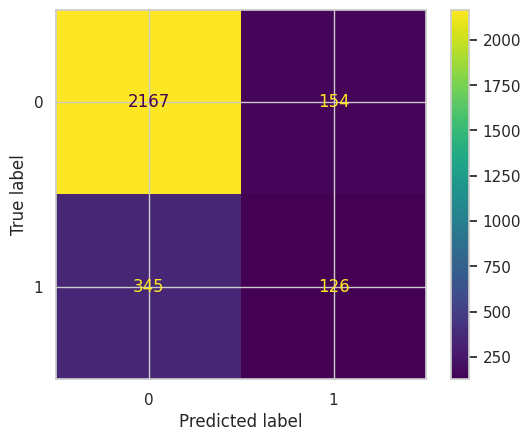

In [57]:
plt.figure(figsize = (15, 8))

# Calculate the values for each quadrant in the confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of the confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = log_clf.classes_)

# Display the confusion matrix
log_disp.plot(values_format='')

# Display the plot
plt.show()

**Explanation**
* The upper-left quadrant displays the number of **true negatives**.
* The bottom-left quadrant displays the number of **false negatives**.
* The upper-right quadrant displays the number of **false positives**.
* The bottom-right quadrant displays the number of **true positives**.

**Responses:**

We can define the above bolded terms as follows in our given context:
* **True negatives**: The number of employees who did not leave that the model accurately predicted did not leave.
* **False negatives**: The number of employees who left the company but the model inaccurately predicted as did not leave.
* **False positives**: The number of employees who did not leave the company but the model inaccurately predicted as leaving.
* **True positives**: The number of employees who left, the model accurately predcited as leaving.


*Note: A perfect model would yield all true negatives and true positives, and no false negatives or false positives.*


**Check the class balance in the data. In other words, check the value counts in the `left_company` column.**

In [58]:
# This is a binary classification task, the class balance informs the way you interpret accuracy metrics.
df_logreg['left_company'].value_counts(normalize=True)

left_company
0    0.831468
1    0.168532
Name: proportion, dtype: float64

**Responses:**
- There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced.

**Create a classification report that includes:**
   - Precision
   - Recall
   - F1-score
   - Accuracy
    
These metrics are calculated to evaluate the performance of the logistic regression model.

In [59]:
# Create a classification report for logistic regression model
target_names = ['Prediction would not leave', 'Prediction would leave']
print(classification_report(y_test, y_pred, target_names = target_names))

                            precision    recall  f1-score   support

Prediction would not leave       0.86      0.93      0.90      2321
    Prediction would leave       0.45      0.27      0.34       471

                  accuracy                           0.82      2792
                 macro avg       0.66      0.60      0.62      2792
              weighted avg       0.79      0.82      0.80      2792



**Responses:**
- The classification report above shows that the logistic regression model achieved a **precision of 79%**, **recall of 82%**, **f1-score of 80% (all weighted averages)**, and **accuracy of 82%**.
- However, it's most important to predict employees who would leave the company, then the scores are significantly lower.

###**Modeling approach B: Tree-based Model**

- This approach covers implementation of **Decision Tree** and **Random Forest**.

**Select the features**

**Isolate the outcome variable**

**Set X and y variables.**

In [60]:
# Select the features to set the X variable
X = df_enc.drop('left_company', axis=1)
X.head()

satisfaction_level  last_performance_evaluation  number_of_projects  \
0                0.38                         0.53                   2   
1                0.80                         0.86                   5   
2                0.11                         0.88                   7   
3                0.72                         0.87                   5   
4                0.37                         0.52                   2   

   average_monthly_hours  time_spend_company  work_accident  \
0                    157                   3              0   
1                    262                   6              0   
2                    272                   4              0   
3                    223                   5              0   
4                    159                   3              0   

   promotion_last_five_years  salary  department_IT  department_RandD  \
0                          0       0          False             False   
1                          0       1          False             False   
2                          0       1          False             False   
3                          0       0          False             False   
4                          0       0          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  
0               False                 False  
1               False                 False  
2               False                 False  
3               False                 False  
4               False                 False

In [61]:
# Isolate the outcome variable to set the y variable
y = df_enc[['left_company']]
y.head()

left_company
0             1
1             1
2             1
3             1
4             1

**Split the data into training, validating, and testing sets**

In [62]:
# Split the data into training and testing (holdout) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

Now, there are 2 approaches.

Both approaches will yield the same best parameters.

However, the first approach is simpler and more direct, while the second approach offers more flexibility and allows for more advanced parameter tuning strategies.


**Approach 1: Fit model directly to the training data and check best parameters**

**Approach 2: Set up a cross-validated grid search and check best parameters**
- The grid search is exhaustive and evaluates all possible combinations of hyperparameters

###**Approach 1:**

**Fit the model on the training set, use the 'predict()' function on the testing set, and assign those predictions to the variable 'dt_pred'**


In [63]:
'''
Make a decision tree instance called 'decision_tree' and pass in '0' to the 'random_state' parameter.
Fit the model on the training set, use the 'predict()' function on the testing set, and assign those predictions to the variable
'dt_pred'
'''
# Model building
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit a decision tree classifier model to the data
decision_tree.fit(X_train, y_train)

# Use the Decision Tree Classifier on the test set
dt_pred = decision_tree.predict(X_test)

**Create a confusion matrix**

<Figure size 1000x600 with 0 Axes>

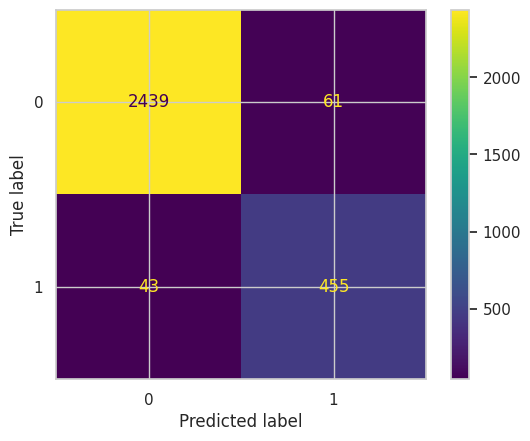

In [64]:
# Produce a confusion matrix to know the types of errors made by an algorithm

# Calculate the values for each quadrant in the confusion matrix
dt_cm = confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)

# Create display of the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = dt_cm, display_labels = decision_tree.classes_)

# Display the confusion matrix
plt.figure(figsize = (10, 6))
disp.plot(values_format='')

# Display the plot
plt.show()

**Responses:**

In the confusion matrix, there are a high proportion of true positives and true negatives (where the matrix accurately predicted that the employee would leave or not leave the company, respectively).

**Note: Decision trees can be particularly susceptible to overfitting. Combining hyperparameter tuning and grid search can help ensure this doesn't happen.**


**Results and Evaluation**

In [65]:
# Print out the decision tree model's accuracy, precision, recall and F1 score.
print("Decision Tree:")
print()
print("Accuracy:", "%.6f" % accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % f1_score(y_test, dt_pred))

Decision Tree:

Accuracy: 0.965310
Precision: 0.881783
Recall: 0.913655
F1 Score: 0.897436


###**Approach 2**

###**Decision tree - Round 1**

**Construct a decision tree model and set up cross-validated grid-search to exhaustively search for the best model parameters.**

In [73]:
# Instantiate  the model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
            'min_samples_leaf': [2, 5, 1],
            'min_samples_split': [2, 4, 6]
            }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc'
}


# Instantiate the GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

**Fit the decision tree model to the training data**

In [74]:
# Add the magic function `%%time` to keep track of the amount of time it takes to fit the model
# and display this information once execution has completed.
%%time
tree1.fit(X_train, y_train)

CPU times: user 8.65 s, sys: 28.3 ms, total: 8.68 s
Wall time: 9.87 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

**Identify the optimal values for the decision tree parameters**

In [75]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [76]:
# Check best AUC score on CV
tree1.best_score_

0.969819392792457

**Responses:**
- This is a strong AUC score, which shows that the model can predict employees who will leave the company

**Next, write a function that will help you extract all the scores from the grid search**

In [77]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object : a fit GridSearchCV object
        metric (string): accuracy, precision, recall, f1, or auc

    Returns a pandas dataframe with accuracy, precision, recall, f1, and auc scores for the model with the best mean 'metric'
    scores across all validation folds.
    '''

    # Create a dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'accuracy': 'mean_test_accuracy',
                  'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1'
                  }

    # Get all the results from the cv and put them in a dataframe
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract AUC, F1, Recall, Precision, and Accuracy score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create a table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                         'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'auc':[auc]
                         })

    return table

**Use the function just defined to get all the scores from grid search**

In [78]:
# Get all CV scores
tree1_cv_results = make_results('Decision Tree CV', tree1, 'auc')
tree1_cv_results

model  precision    recall        f1  accuracy       auc
0  Decision Tree CV   0.914552  0.916949  0.915707  0.971978  0.969819

**Responses:**
- All of these scores from the decision tree model are strong indicators of good model performance.
- Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions.

**Construct a random forest model next**

###**Random Forest - Round 1**

**Construct a random forest model and set up cross-validated grid-search to exhaustively search for the best model parameters**

In [81]:
# Instantiate the model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {
    'max_depth': [3, 5, None],
    'max_features': [1.0],
    'max_samples': [0.7, 1.0],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [300, 500],
}

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearchCV
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')


**Fit the random forest model to the training data**

In [83]:
# Add the magic function `%%time` to keep track of the amount of time it takes to fit the model
# and display this information once execution has completed.
%%time
rf1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

CPU times: user 30min 38s, sys: 3.89 s, total: 30min 42s
Wall time: 31min 5s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

**Identify the best AUC score acheived by the random forest model on the training set**

In [84]:
# Check the best AUC score on CV
rf1.best_score_

0.9804250949807172

**Identify the optimal values for the parameters of the random forest model**

In [85]:
# Check best parameters
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

**Collect the evaluation scores on the training set for the decision tree and random forest models**

In [86]:
# Get all CV scores
rf1_cv_results = make_results('Random Forest CV', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        f1  accuracy       auc
0  Decision Tree CV   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        f1  accuracy       auc
0  Random Forest CV   0.950023  0.915614  0.932467  0.977983  0.980425


**Responses:**
- The evaluation scores of the random forest model are better than those of the decision tree model, with the exception of recall.

- This indicates that the random forest model mostly outperforms the decision tree model.

**Construct an XGBoost model next.**

###**XGBoost - Round 1**

- XGBoost model is a very powerful extension of decision trees.
- This model has many useful optimizations that include fast training, effective regularization of features, tunable hyperparameters which can improve model predictions.

**Construct an XGBoost model and set up cross-validated grid-search to exhaustively search for the best model parameters**

In [89]:
# Instantiate the XGB classifier
'''
Note: The target variable is a binary type of variable
Use the XGBClassifier() from 'xgboost'
Set the objective as 'binary:logistic'
'''

xgb = XGBClassifier(objective = 'binary:logistic', random_state= 0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [5, 7],
            'min_child_weight': [3, 5],
            'learning_rate': [0.1, 0.01],
            'n_estimators': [100],
            'subsample': [1.0],
            'colsample_bytree': [1.0]}

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
xgb1 = GridSearchCV(xgb, cv_params, scoring = scoring, cv = 4, n_jobs = -1, verbose = 1, refit = 'roc_auc')

**Fit the XGBoost model to the training data**

In [90]:
xgb1.fit(X_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [1.0],
                         'learning_rate': [0.1, 0.01], 'max_depth': [5, 7],
                         'min_child_weight': [3, 5], 'n_estimators': [100],
                         'subsample': [1.0]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'},
             verbose=1)

**Identify the best AUC score achieved by the XGBoost model on the training set**

In [91]:
# Check best AUC score on CV
xgb1.best_score_

0.9843617811931011

**Identify the optimal values for the parameters on the XGBoost model**

In [92]:
# Check best params
xgb1.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 100,
 'subsample': 1.0}

In [93]:
# Get all CV scores
xgb1_cv_results = make_results('XGBoost CV', xgb1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)
print(xgb1_cv_results)

              model  precision    recall        f1  accuracy       auc
0  Decision Tree CV   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        f1  accuracy       auc
0  Random Forest CV   0.950023  0.915614  0.932467  0.977983  0.980425
        model  precision    recall        f1  accuracy       auc
0  XGBoost CV   0.972821  0.910922  0.940841  0.980985  0.984362


**Responses:**
- The evaluation scores of the XGBoost model are better than those of the decision tree model and the random forest model, with the exception of recall.

- This indicates that the XGBoost model mostly outperforms the decision tree model and the random forest model.

**Next, evaluation of the final model can be done on the test set**

**Define a function that gets all the scores from a models predictions**

In [94]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): How you want your model to be named in the output table
        model: a fit GridSearchCV object
        X_test_data: numpy array of X_test data
        y_test_data: numpy array of y_test data

    Out: pandas dataframe of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                         'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'auc':[auc]
                         })

    return table

**Model selection and final results**

**Predicting on the test data**

- Now, we're ready to select a champion model. Based on the above validation data, the XGBoost model appears to have the highest precision, F1 score, accuracy, and AUC with the exception of recall compared to the Decision trees, Random forest models.
- Therefore, the XGBoost model is likely the best choice for making predictions on the test data.
- Since, we won't be building any more models, we can at last use our champion model (XGBoost) to predict on the test data.

In [95]:
# Get predictions on test data
xgb1_test_scores = get_scores('XGBoost model test', xgb1, X_test, y_test)
xgb1_test_scores

model  precision    recall        f1  accuracy       auc
0  XGBoost model test   0.976445  0.915663  0.945078  0.982322  0.955631

**Responses:**
- The test scores are very similar to the validation scores, which is good.
- This appears to be a strong model.
- Since this test set was only used for this model, you can be more confident that your model's performance on this data is representative of how it will perform on new, uneen data.


**Note: High evaluation scores are observed.
There is a chance that there is some data leakage occurring.**

**Data leakage** is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not the data that you would expect to have when the model is actually deployed.

- Training a model with leaked data can give an unrealistic score that is not replicated in production.

- In this case, it's likely that the company won't have `satisfaction_levels` reported for all of its employees.
- It's also possible that the `average_monthly_hours` column is a source of some data leakage.
- If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

**The first round of decision tree and random forest included all variables as features.**

**In the next round, we will incorporate feature engineering to build improved models.**

**We can proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature `overworked`.**

**`overworked` variable will be a binary type of variable.**

###**Feature Engineering**

In [96]:
# Drop satisfaction level and save the resulting dataframe in a new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

last_performance_evaluation  number_of_projects  average_monthly_hours  \
0                         0.53                   2                    157   
1                         0.86                   5                    262   
2                         0.88                   7                    272   
3                         0.87                   5                    223   
4                         0.52                   2                    159   

   time_spend_company  work_accident  left_company  promotion_last_five_years  \
0                   3              0             1                          0   
1                   6              0             1                          0   
2                   4              0             1                          0   
3                   5              0             1                          0   
4                   3              0             1                          0   

   salary  department_IT  department_RandD  department_accounting  \
0       0          False             False                  False   
1       1          False             False                  False   
2       1          False             False                  False   
3       0          False             False                  False   
4       0          False             False                  False   

   department_hr  department_management  department_marketing  \
0          False                  False                 False   
1          False                  False                 False   
2          False                  False                 False   
3          False                  False                 False   
4          False                  False                 False   

   department_product_mng  department_sales  department_support  \
0                   False              True               False   
1                   False              True               False   
2                   False              True               False   
3                   False              True               False   
4                   False              True               False   

   department_technical  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False

In [97]:
# Create 'overworked' column. For now, it is identical to average monthly hours
df2['overworked'] = df2['average_monthly_hours']

# Examine max and min average monthly hours values
print("Maximum average monthly hours:", df2['average_monthly_hours'].max())
print("Minimum average monthly hours:", df2['average_monthly_hours'].min())

Maximum average monthly hours: 310
Minimum average monthly hours: 96


**Responses:**
- 166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day.


**We could define being overworked as working more than 175 hours per month on average.**

To make the `overworked` column binary, we could reassign the column using a boolean mask.
- `df3['overworked'] > 175` creates a series of booleans, consisting of `True` for every value > 175 and `False` for every values ≤ 175
- `.astype(int)` converts all `True` to `1` and all `False` to `0`

In [98]:
# Define 'overworked' as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

**Drop the `average_monthly_hours` column**

In [99]:
# Drop the average_monthly_hours column
df2 = df2.drop('average_monthly_hours', axis=1)

In [100]:
df2.head()

last_performance_evaluation  number_of_projects  time_spend_company  \
0                         0.53                   2                   3   
1                         0.86                   5                   6   
2                         0.88                   7                   4   
3                         0.87                   5                   5   
4                         0.52                   2                   3   

   work_accident  left_company  promotion_last_five_years  salary  \
0              0             1                          0       0   
1              0             1                          0       1   
2              0             1                          0       1   
3              0             1                          0       0   
4              0             1                          0       0   

   department_IT  department_RandD  department_accounting  department_hr  \
0          False             False                  False          False   
1          False             False                  False          False   
2          False             False                  False          False   
3          False             False                  False          False   
4          False             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  overworked  
0              True               False                 False           0  
1              True               False                 False           1  
2              True               False                 False           1  
3              True               False                 False           1  
4              True               False                 False           0

**Again, isolate the features and target variable**

In [101]:
# Select the features
X = df2.drop('left_company', axis=1)

# Isolate the outcome variable
y = df2['left_company']

**Split the data into training and testing sets**

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

###**Decision tree - Round 2**

**Construct Decision tree model and fit it to the training dataset**

In [106]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [4, 6, 8, None],
            'min_samples_leaf': [2, 5, 1],
            'min_samples_split': [2, 4, 6]
            }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [107]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 4.79 s, sys: 7.99 ms, total: 4.8 s
Wall time: 4.83 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

**Identify the optimal values for the parameters of the random forest model on the training set**

In [108]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

**Identify the AUC score achieved by the random forest model on the training set**

In [109]:
# Check best AUC score CV
tree2.best_score_

0.9586752505340426

- This model performs very well, even without satisfaction levels and detailed hours worked data.

**Next, check other scores**

In [110]:
# Get all CV scores
tree2_cv_results = make_results('Decision Tree2 CV', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        f1  accuracy       auc
0  Decision Tree CV   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        f1  accuracy       auc
0  Decision Tree2 CV   0.856693  0.903553  0.878882  0.958523  0.958675


- Some of the other scores fell.
- That's to be expected given fewer features were taken into account in this round of the model.
- Still, the scores are very good.

###**Random Forest: Round 2**

**Construct the Random Forest model and fit it to the training set**

In [116]:
# Instantiate the model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3, 5, None],
            'max_features': [1.0],
            'max_samples': [0.7, 1.0],
            'min_samples_leaf': [1, 2, 3],
            'min_samples_split': [2, 3, 4],
            'n_estimators': [300, 500],
            }

# Assign a dictionary of hyperparametrs of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate the GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [117]:
%%time
rf2.fit(X_train, y_train)

CPU times: user 22min 5s, sys: 1.88 s, total: 22min 7s
Wall time: 22min 18s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

**Define functions to pickle the model and read in the model**

In [118]:
# Write pickle
# write_pickle(path, rf2, 'hr_rf2')

In [119]:
# Read pickle
# rf2 = read_pickle(path, 'hr_rf2')

**Identify the optimal values for the parameters of the random forest model**

In [120]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

**Identify the best AUC score acheived by the random forest model on the training set**

In [121]:
# Check best AUC score on CV
rf2. best_score_

0.9648100662833985

**Next check other scores**

In [122]:
# Get all CV scores
rf2_cv_results = make_results('Random Forest2 CV', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        f1  accuracy       auc
0  Decision Tree2 CV   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        f1  accuracy      auc
0  Random Forest2 CV   0.866758  0.878754  0.872407  0.957411  0.96481


- Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the decision metric.


###**XGBoost: Round 2**

**Construct the XGBoost model and fit it to the training set**

In [125]:
# Instantiate the XGB classifier
'''
Note: The target variable is a binary type of variable
Use the XGBClassifier() from 'xgboost'.
Set the objective as 'binary:logistic'
'''

xgb = XGBClassifier(objective = 'binary:logistic', random_state= 0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [5, 7],
            'min_child_weight': [3, 5],
            'learning_rate': [0.1, 0.01],
            'n_estimators': [100],
            'subsample': [1.0],
            'colsample_bytree': [1.0]}

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
xgb2 = GridSearchCV(xgb, cv_params, scoring = scoring, cv = 4, n_jobs = -1, verbose = 1, refit = 'roc_auc')

In [126]:
xgb2.fit(X_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [1.0],
                         'learning_rate': [0.1, 0.01], 'max_depth': [5, 7],
                         'min_child_weight': [3, 5], 'n_estimators': [100],
                         'subsample': [1.0]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'},
             verbose=1)

In [127]:
# Check best params
xgb2.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 100,
 'subsample': 1.0}

In [128]:
# Check best AUC score on CV
xgb2. best_score_

0.9719340468237014

In [129]:
# Get all CV scores
xgb2_cv_results = make_results('XGB2 CV model', xgb2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)
print(xgb2_cv_results)

               model  precision    recall        f1  accuracy       auc
0  Decision Tree2 CV   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        f1  accuracy      auc
0  Random Forest2 CV   0.866758  0.878754  0.872407  0.957411  0.96481
           model  precision   recall       f1  accuracy       auc
0  XGB2 CV model   0.900757  0.88212  0.89129  0.964306  0.971934


**Score the champion model on the test set now**

**Test the XGBoost model: Use the model to make predictions on the test set**

In [130]:
# Get predictions on test data
xgb2_test_scores = get_scores('XGBoost2 Test', xgb2, X_test, y_test)
xgb2_test_scores

model  precision    recall        f1  accuracy       auc
0  XGBoost2 Test   0.899194  0.895582  0.897384  0.965977  0.937791

**Responses:**
- These values seems to be a stable, well-performing final model.


**Plot a confusion matrix to visualize how well it predicts on the test set.**

<Figure size 1000x600 with 0 Axes>

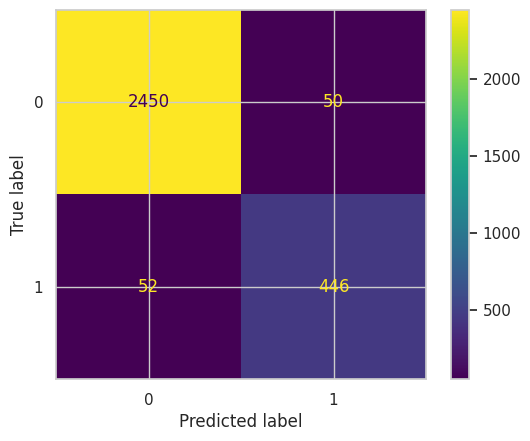

<Figure size 1000x600 with 0 Axes>

In [131]:
# Generate array of values for confusion matrix
preds = xgb2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels = rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb2.classes_)
disp.plot(values_format = '')
plt.figure(figsize = (10, 6))

**Responses:**
- The model predicts more false negatives than false positives, which means that some of the employees who left the company but the model inaccurately predicted as did not leave. But still, this is a strong model.

###**Decision tree splits**

- For exploratory purpose, we might want to inspect the splits of the decision tree model and the most important features in the random forest model.

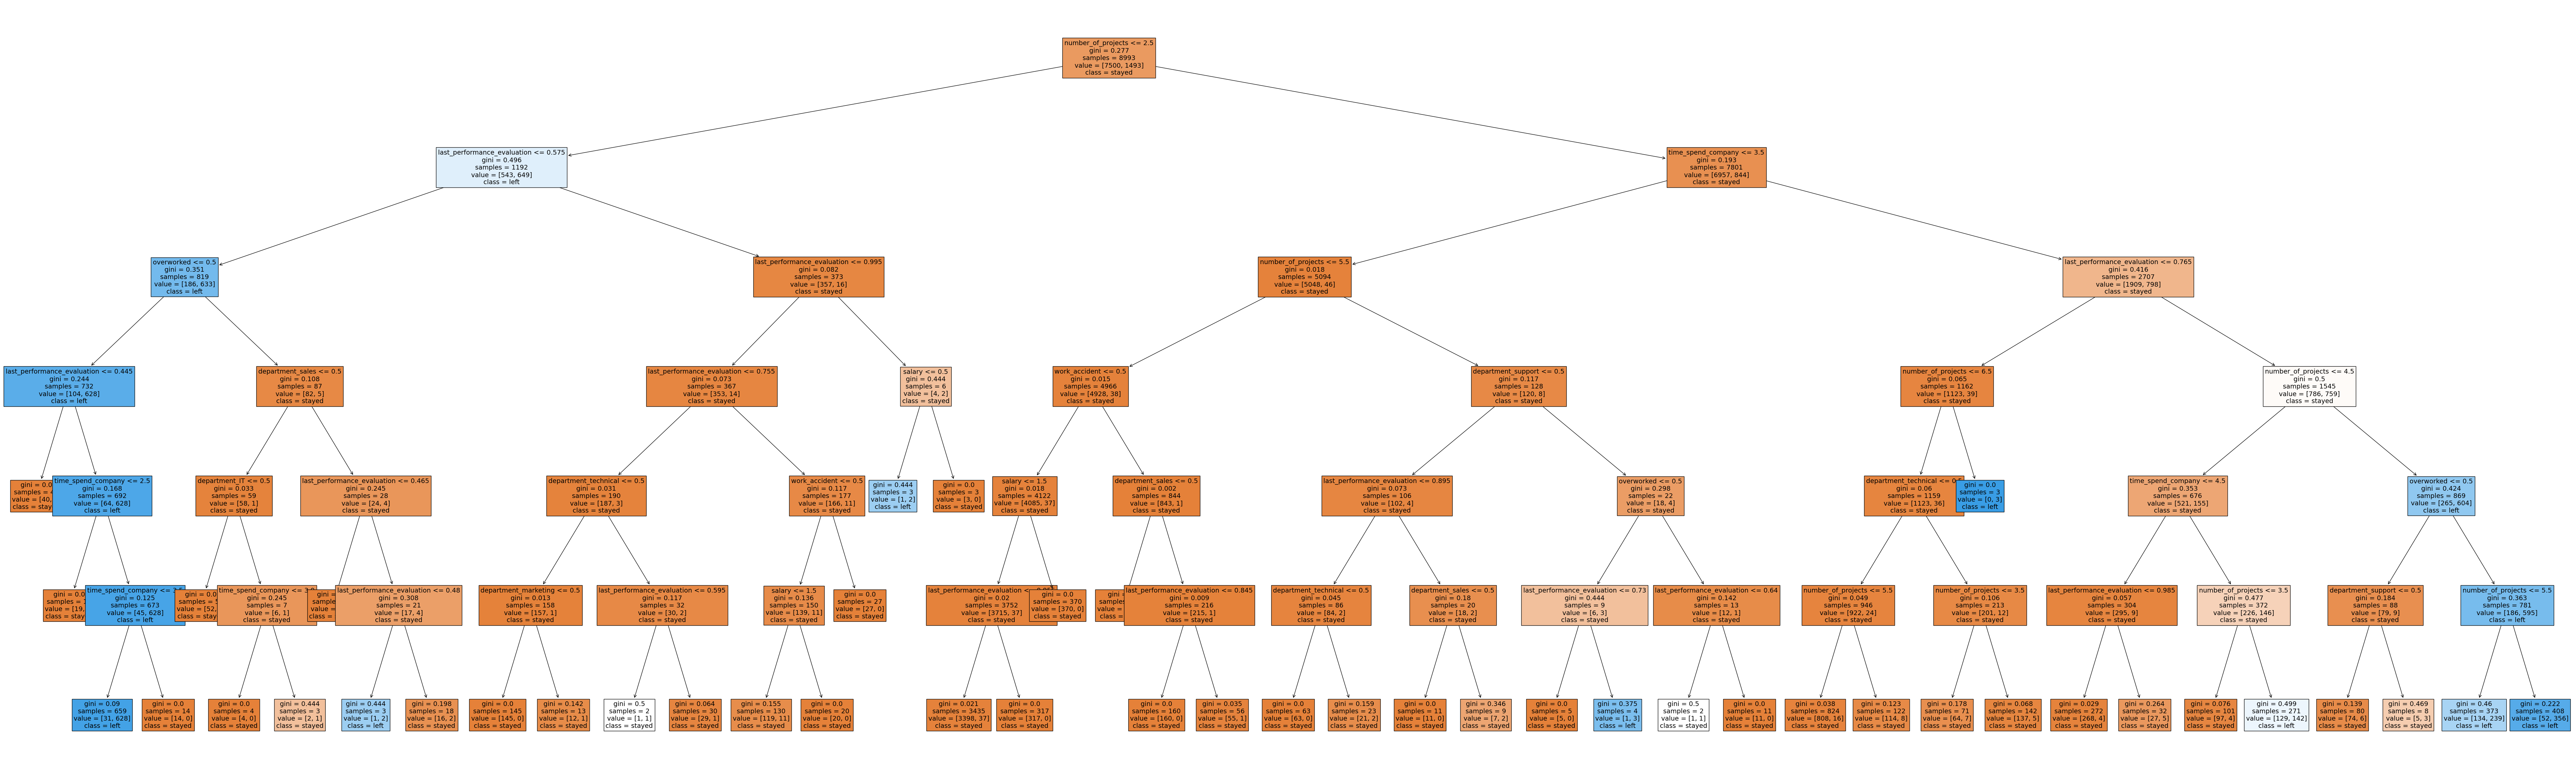

In [132]:
sns.reset_defaults()

# Plot the tree
plt.figure(figsize = (100, 30))
plot_tree(tree2.best_estimator_, max_depth = 6, fontsize = 14, feature_names = X.columns,
          class_names = {0: 'stayed', 1: 'left'}, filled = True)

plt.show()

###**Decision tree feature importance**

In [133]:
# tree2_importance = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns = X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_,
                                 columns = ['gini_importance'],
                                index = X.columns)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
last_performance_evaluation         0.343958
number_of_projects                  0.343385
time_spend_company                  0.215681
work_accident                       0.000183
salary                              0.000910
department_IT                       0.000139
department_marketing                0.000078
department_sales                    0.000607
department_support                  0.001142
department_technical                0.000418
overworked                          0.093498

**Plot the feature importances for the decision tree model**

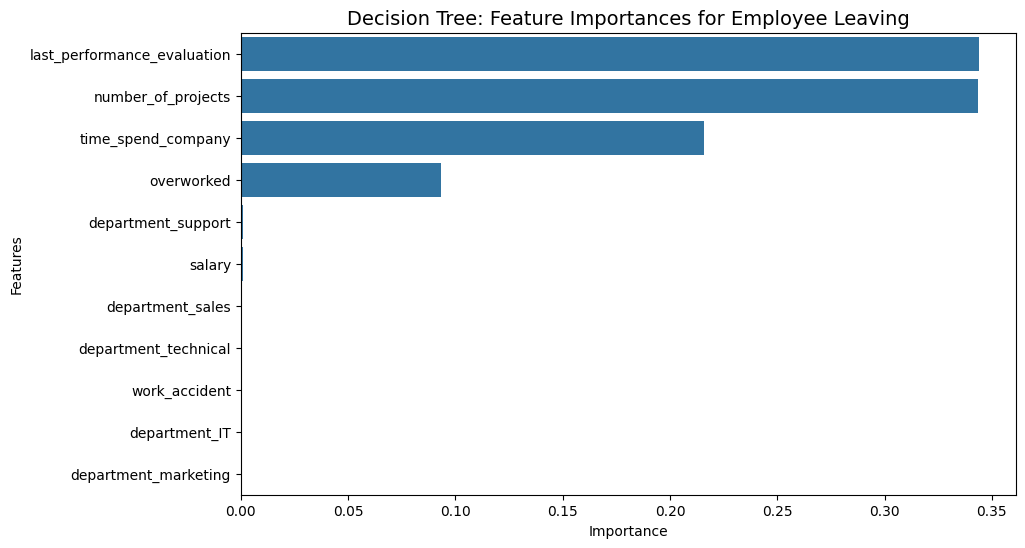

In [134]:
# Sort the DataFrame by the "gini_importance" column in descending order
tree2_importances_sorted = tree2_importances.sort_values(by="gini_importance", ascending=False)

# Create a bar plot to visualize the decision tree feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=tree2_importances_sorted, x="gini_importance", y=tree2_importances_sorted.index, orient='h')

# Add labels and title
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=14)

# Display the plot
plt.show()

- The barplot shows that in this decision tree model, `last_evaluation`, `number_of_projects`, `time_spend_company`, and `overworked` have the highest importance, in that order.
- These variables are most helpful in predicting the outcome variable, `left_company`.

###**Random Forest Feature Importance**

**Plot the feature importances for the random forest model**

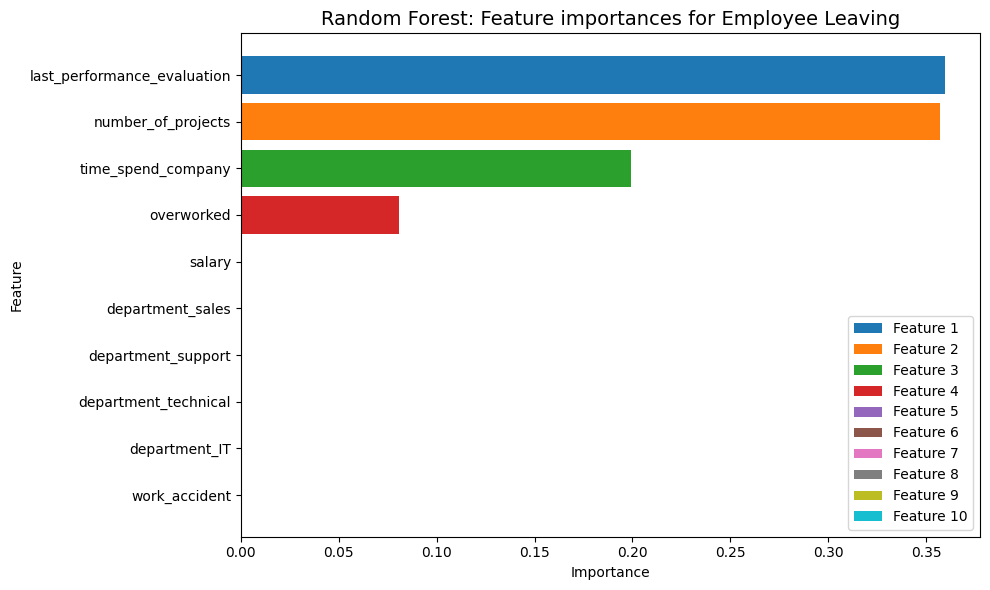

In [135]:
# Get feature importances
importances = rf2.best_estimator_.feature_importances_

# Get the indices of the most important features. Select top 10 features
indices = np.argsort(importances)[::-1][:10]

# Define colors for each feature (Using tab10 colormap for 10 different colors)
colors = plt.cm.tab10(np.arange(10))

# Plot feature importances with different colors
plt.figure(figsize=(10, 6))
plt.title("Random Forest: Feature importances for Employee Leaving", fontsize=14)
bars = plt.barh(range(10), importances[indices], color=colors, align="center")
plt.yticks(range(10), X_train.columns[indices])

# Add legend
legend_labels = [f"Feature {i+1}" for i in range(10)]
plt.legend(bars, legend_labels, loc="lower right")

plt.xlabel("Importance")
plt.ylabel("Feature")

# Invert y-axis to have the highest importance at the top
plt.gca().invert_yaxis()

# Display the plot
plt.tight_layout()
plt.show()

- The plot above shows that in this random forest model, `last_performance_evaluation`, `number_of_projects`, `time_spend_company`, and `overworked` have the highest importance, in that order.
- These variables are most helpful in predicting the outcome variable, `left_company`, and they are the same as the ones used by the decision tree model.

#**pacE: Execute Stage**
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
##**Evaluation metrics**

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



##**Step 4. Results and Evaluation**
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




###**Summary of model results**

**Logistic Regression**

- The Logistic regression model achieved precision of 79%, recall of 82%, f1-score of 80% and accuracy of 82% on the test set.

**Tree-based Machine learning**

- After feature engineering, the decision tree model achieved AUC of 95.8%, precision of 85.7%, recall of 90.3%, f1-score of 87.8% and accuracy of 95.8% on the test set.
- Random forest model modestly outperformed on the decision tree model.
- The champion model was Random Forest model.
- The random forest model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, accuracy of 96.2% on the test set.

###**Conclusion, Recommendations, Next Steps**

The models and the feature importances extracted from the models confirm that employees at the company are overworked.


To retain employees, following recommendations could be presented to the stakeholders:

1) **Manage Workload:**

Monitor and manage employee workload, especially for those working excessively long hours.
Either reward employees for working longer hours, or don't require them to do so.
Cap the number of projects that employees can work on.
Ensure a balanced distribution of projects to prevent burnout and dissatisfaction.

2) **Retention Strategies:**

Implement retention strategies tailored to different employee groups identified, such as those working considerably less or significantly more hours than their peers.
Focus on improving job satisfaction, providing career advancement opportunities, and recognizing employee contributions.

3) **Promotion Policies:**

If employees are unfamiliar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off are not explicit, make them clear.
Consider promoting employees who have been with the company for atleast 4 years. Conduct further investigation about why 4-year tenured employees are so dissatisfied.

4) **Performance Evaluation:**

High evaluation scores not be reserved for employees who work 200+ hours per month.
Consider a proportionate scale for rewarding employees who contribute or put in more effort.
Reassess performance evaluation criteria to consider factors beyond just working hours, such as project involvement, productivity, and quality of work.

5) **Salary and Benefits:**

Review compensation packages to ensure they are competitive and commensurate with the level of work and contribution.
Address disparities between workload and compensation to reduce dissatisfaction among employees.

6) **Management Practices:**

Address issues related to poor management practices, including low pay despite long hours, lack of promotions, and burnout among employees.
Provide training and support for managers to improve leadership skills and employee engagement.

7) **Tenure and Satisfaction:**

Recognize the importance of tenure in employee retention but also address dissatisfaction among employees with longer tenures, particularly those with low satisfaction levels.

8) **Departmental Differences:**

Investigate departmental differences in terms of employee turnover and satisfaction to identify any specific challenges or issues that need to be addressed.

9) **Regular Feedback:**

Establish regular feedback mechanisms to understand employee concerns and address issues proactively.
Encourage open communication between employees and management to foster a positive work environment.

10) **Work-Life Balance:**

Hold company-wide and within-team discussions to understand and address the company-work culture, across the board and in specific contexts.
Promote work-life balance initiatives to ensure employees are not overworked and have time for personal and family commitments.